In [51]:
# https://towardsdatascience.com/a-covid-analysis-9c8f7f9ea474

import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from statsmodels.regression.linear_model import OLS
from sklearn.linear_model import LinearRegression
import math
from math import sqrt
from sklearn.metrics import mean_squared_error
from random import random
import datetime as dt

In [52]:
df = pd.read_csv("/home/gsimpson/PycharmProjects/pythonProject1/towardsDataScience/data/owid-covid-data.csv")
#train = pd.read_csv("/home/gsimpson/PycharmProjects/pythonProject1/mediumNotes/data/titanic/train.csv")


#Keeping only relevant columns
df = df[['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases','total_deaths', 'new_deaths','reproduction_rate', 'icu_patients',
         'hosp_patients','new_tests', 'total_tests','positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations','stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index']]
#A very important step
df['date'] = pd.to_datetime(df['date'])

In [53]:
# %matplotlib inline

# Creating function for additional columns and some analyses
def analyse_df(df):
    df['case_rate'] = (df['total_cases']/df['population'])*100
    df['death_rate'] = (df['total_deaths']/df['population'])*100
    df['test_rate'] = (df['total_tests']/df['population'])*100
    df['admissions_rate'] = (df['hosp_patients']/df['population'])*100
    df['critical_rate'] = (df['icu_patients']/df['population'])*100
    df['vaccination_rate'] = (df['people_fully_vaccinated']/df['population'])*100
    print('Columns: ', df.columns)
    print('Dataframe shape: ', df.shape)
    print('Date Range', df['date'].min(),df['date'].max())
    #get some stats for each country using groupby
    stats_df = df.groupby('location')[['date','case_rate','death_rate','test_rate','vaccination_rate',
                    'admissions_rate','critical_rate','stringency_index',
                                 'population']].agg({"date":['max', 'count'],
                 'case_rate':'max','death_rate':'max','test_rate':'max','vaccination_rate':'max',
                    'admissions_rate':'mean','critical_rate':'mean','stringency_index':'mean','population':'mean'})
    display(stats_df)
    display(df.corr())
    sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
    plt.xticks(rotation=45)
    plt.rcParams['figure.figsize'] = 12,8
    return df, stats_df

Columns:  Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'reproduction_rate', 'icu_patients',
       'hosp_patients', 'new_tests', 'total_tests', 'positive_rate',
       'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'case_rate', 'death_rate',
       'test_rate', 'admissions_rate', 'critical_rate', 'vaccination_rate'],
      dtype='object')
Dataframe shape:  (84530, 42)
Date Range 2020-01-01 00:00:00 2021-04-28 00:00:00


date        case_rate death_rate   test_rate  \
                   max count        max        max         max   
location                                                         
Afghanistan 2021-04-27   429   0.152139   0.006674         NaN   
Africa      2021-04-27   440   0.337391   0.009010         NaN   
Albania     2021-04-27   428   4.542915   0.082806   20.603656   
Algeria     2021-04-27   428   0.276719   0.007354         NaN   
Andorra     2021-04-27   422  16.981816   0.160487  229.183977   
...                ...   ...        ...        ...         ...   
Vietnam     2021-04-27   461   0.002935   0.000036    2.550173   
World       2021-04-27   462   1.907899   0.040219         NaN   
Yemen       2021-04-27   383   0.020854   0.004047         NaN   
Zambia      2021-04-27   406   0.497271   0.006794    7.500812   
Zimbabwe    2021-04-27   404   0.256773   0.010530    3.240761   

            vaccination_rate admissions_rate critical_rate stringency_index  \
                         max            mean          mean             mean   
location                                                                      
Afghanistan              NaN             NaN           NaN        37.618368   
Africa              0.356220             NaN           NaN              NaN   
Albania             0.022760             NaN           NaN        63.216799   
Algeria                  NaN             NaN           NaN        72.021475   
Andorra             6.058371             NaN           NaN        48.320972   
...                      ...             ...           ...              ...   
Vietnam                  NaN             NaN           NaN        59.858913   
World               3.186326             NaN           NaN              NaN   
Yemen                    NaN             NaN           NaN        33.769476   
Zambia                   NaN             NaN           NaN        45.753713   
Zimbabwe            0.425643             NaN           NaN        74.369800   

               population  
                     mean  
location                   
Afghanistan  3.892834e+07  
Africa       1.340598e+09  
Albania      2.877800e+06  
Algeria      4.385104e+07  
Andorra      7.726500e+04  
...                   ...  
Vietnam      9.733858e+07  
World        7.794799e+09  
Yemen        2.982597e+07  
Zambia       1.838396e+07  
Zimbabwe     1.486293e+07  

[219 rows x 10 columns]

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,new_tests,total_tests,positive_rate,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,case_rate,death_rate,test_rate,admissions_rate,critical_rate,vaccination_rate
total_cases,1.000000,0.885841,0.986412,0.847699,0.001413,0.791554,0.745391,0.806667,0.960532,0.020523,...,0.030472,-0.006988,0.021670,0.037406,0.135142,0.160096,0.124267,0.092370,0.206212,-0.050623
new_cases,0.885841,1.000000,0.895100,0.924108,0.016820,0.929790,0.904945,0.812384,0.713883,0.089240,...,0.034459,-0.005538,0.025254,0.042321,0.099268,0.122483,0.069623,0.168534,0.288360,-0.086711
total_deaths,0.986412,0.895100,1.000000,0.878181,0.000364,0.807841,0.778774,0.783374,0.884067,0.067565,...,0.039829,-0.010479,0.026325,0.041930,0.121715,0.176033,0.104414,0.099766,0.195636,-0.059464
new_deaths,0.847699,0.924108,0.878181,1.000000,0.006092,0.901950,0.908504,0.710639,0.610765,0.175195,...,0.044319,-0.006402,0.027466,0.044972,0.087964,0.135936,0.046458,0.240942,0.343635,-0.099902
reproduction_rate,0.001413,0.016820,0.000364,0.006092,1.000000,-0.081261,-0.086598,-0.027190,-0.037874,0.086020,...,0.123829,0.063835,0.135803,0.145000,-0.024279,-0.038930,-0.074495,-0.161238,-0.207632,-0.206521
icu_patients,0.791554,0.929790,0.807841,0.901950,-0.081261,1.000000,0.960434,0.853593,0.802208,0.133912,...,NaN,-0.068019,-0.116777,0.061396,0.239031,0.261596,0.036292,0.212010,0.344877,-0.022100
hosp_patients,0.745391,0.904945,0.778774,0.908504,-0.086598,0.960434,1.000000,0.801929,0.756386,0.220867,...,NaN,-0.089261,-0.012563,0.014650,0.264505,0.334472,0.035316,0.318758,0.385923,-0.031523
new_tests,0.806667,0.812384,0.783374,0.710639,-0.027190,0.853593,0.801929,1.000000,0.858314,-0.056486,...,0.032921,-0.003226,0.069237,0.124455,0.213763,0.234021,0.201037,0.092334,0.207906,0.047891
total_tests,0.960532,0.713883,0.884067,0.610765,-0.037874,0.802208,0.756386,0.858314,1.000000,-0.047605,...,0.024037,-0.013022,0.040961,0.092870,0.247396,0.239839,0.193132,0.052130,0.205224,0.104558
positive_rate,0.020523,0.089240,0.067565,0.175195,0.086020,0.133912,0.220867,-0.056486,-0.047605,1.000000,...,0.128666,-0.117834,-0.094410,-0.123322,0.163023,0.225191,-0.143682,0.727779,0.683995,-0.135280


Columns:  Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'reproduction_rate', 'icu_patients',
       'hosp_patients', 'new_tests', 'total_tests', 'positive_rate',
       'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'case_rate', 'death_rate',
       'test_rate', 'admissions_rate', 'critical_rate', 'vaccination_rate'],
      dtype='object')
Dataframe shape:  (84530, 42)
Date Range 2020-01-01 00:00:00 2021-04-28 00:00:00


date        case_rate death_rate   test_rate  \
                   max count        max        max         max   
location                                                         
Afghanistan 2021-04-27   429   0.152139   0.006674         NaN   
Africa      2021-04-27   440   0.337391   0.009010         NaN   
Albania     2021-04-27   428   4.542915   0.082806   20.603656   
Algeria     2021-04-27   428   0.276719   0.007354         NaN   
Andorra     2021-04-27   422  16.981816   0.160487  229.183977   
...                ...   ...        ...        ...         ...   
Vietnam     2021-04-27   461   0.002935   0.000036    2.550173   
World       2021-04-27   462   1.907899   0.040219         NaN   
Yemen       2021-04-27   383   0.020854   0.004047         NaN   
Zambia      2021-04-27   406   0.497271   0.006794    7.500812   
Zimbabwe    2021-04-27   404   0.256773   0.010530    3.240761   

            vaccination_rate admissions_rate critical_rate stringency_index  \
                         max            mean          mean             mean   
location                                                                      
Afghanistan              NaN             NaN           NaN        37.618368   
Africa              0.356220             NaN           NaN              NaN   
Albania             0.022760             NaN           NaN        63.216799   
Algeria                  NaN             NaN           NaN        72.021475   
Andorra             6.058371             NaN           NaN        48.320972   
...                      ...             ...           ...              ...   
Vietnam                  NaN             NaN           NaN        59.858913   
World               3.186326             NaN           NaN              NaN   
Yemen                    NaN             NaN           NaN        33.769476   
Zambia                   NaN             NaN           NaN        45.753713   
Zimbabwe            0.425643             NaN           NaN        74.369800   

               population  
                     mean  
location                   
Afghanistan  3.892834e+07  
Africa       1.340598e+09  
Albania      2.877800e+06  
Algeria      4.385104e+07  
Andorra      7.726500e+04  
...                   ...  
Vietnam      9.733858e+07  
World        7.794799e+09  
Yemen        2.982597e+07  
Zambia       1.838396e+07  
Zimbabwe     1.486293e+07  

[219 rows x 10 columns]

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,new_tests,total_tests,positive_rate,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,case_rate,death_rate,test_rate,admissions_rate,critical_rate,vaccination_rate
total_cases,1.000000,0.885841,0.986412,0.847699,0.001413,0.791554,0.745391,0.806667,0.960532,0.020523,...,0.030472,-0.006988,0.021670,0.037406,0.135142,0.160096,0.124267,0.092370,0.206212,-0.050623
new_cases,0.885841,1.000000,0.895100,0.924108,0.016820,0.929790,0.904945,0.812384,0.713883,0.089240,...,0.034459,-0.005538,0.025254,0.042321,0.099268,0.122483,0.069623,0.168534,0.288360,-0.086711
total_deaths,0.986412,0.895100,1.000000,0.878181,0.000364,0.807841,0.778774,0.783374,0.884067,0.067565,...,0.039829,-0.010479,0.026325,0.041930,0.121715,0.176033,0.104414,0.099766,0.195636,-0.059464
new_deaths,0.847699,0.924108,0.878181,1.000000,0.006092,0.901950,0.908504,0.710639,0.610765,0.175195,...,0.044319,-0.006402,0.027466,0.044972,0.087964,0.135936,0.046458,0.240942,0.343635,-0.099902
reproduction_rate,0.001413,0.016820,0.000364,0.006092,1.000000,-0.081261,-0.086598,-0.027190,-0.037874,0.086020,...,0.123829,0.063835,0.135803,0.145000,-0.024279,-0.038930,-0.074495,-0.161238,-0.207632,-0.206521
icu_patients,0.791554,0.929790,0.807841,0.901950,-0.081261,1.000000,0.960434,0.853593,0.802208,0.133912,...,NaN,-0.068019,-0.116777,0.061396,0.239031,0.261596,0.036292,0.212010,0.344877,-0.022100
hosp_patients,0.745391,0.904945,0.778774,0.908504,-0.086598,0.960434,1.000000,0.801929,0.756386,0.220867,...,NaN,-0.089261,-0.012563,0.014650,0.264505,0.334472,0.035316,0.318758,0.385923,-0.031523
new_tests,0.806667,0.812384,0.783374,0.710639,-0.027190,0.853593,0.801929,1.000000,0.858314,-0.056486,...,0.032921,-0.003226,0.069237,0.124455,0.213763,0.234021,0.201037,0.092334,0.207906,0.047891
total_tests,0.960532,0.713883,0.884067,0.610765,-0.037874,0.802208,0.756386,0.858314,1.000000,-0.047605,...,0.024037,-0.013022,0.040961,0.092870,0.247396,0.239839,0.193132,0.052130,0.205224,0.104558
positive_rate,0.020523,0.089240,0.067565,0.175195,0.086020,0.133912,0.220867,-0.056486,-0.047605,1.000000,...,0.128666,-0.117834,-0.094410,-0.123322,0.163023,0.225191,-0.143682,0.727779,0.683995,-0.135280


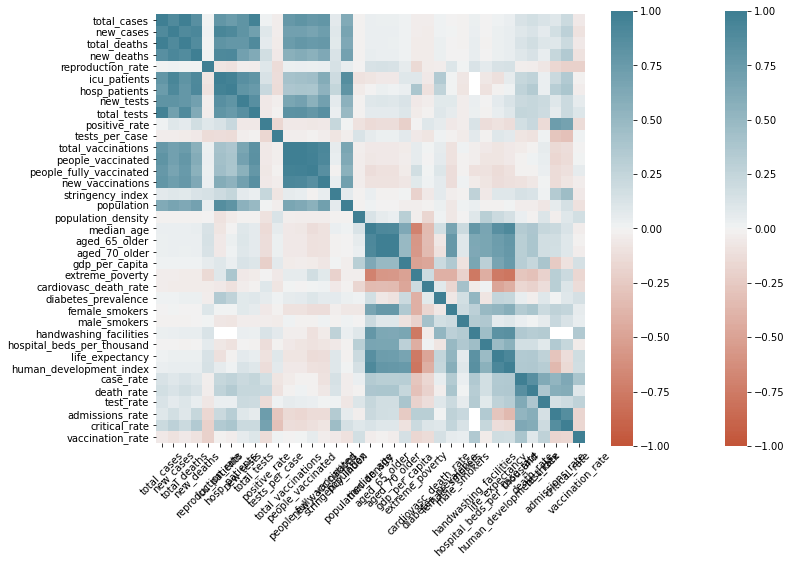

In [54]:
df = analyse_df(df)[0]
stats_df = analyse_df(df)[1]

In [55]:
# import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [2,2]
# plt.plot()
# plt.show()

Build Regression Model
I chose the polynomial model for this particular case as it is the most straightforward
way to analyse and predict the upward trending behaviour of the vaccination rates.
I did try a more advanced time-series analysis with the ARIMA model and found the
results of the polynomial model to be more realistic and accurate.
In the following section, I have shared the code of my analysis. Be sure to read the
comments explaining each and every step along the way.

Create the model function

In [56]:
def poly(name, group):
    # transfrom the date into an integer to be able to fit it into the model
    group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
    # Create a range to be able to tell the model later to predict within this range. I want to predict for a range that is 10 points more than half the number of observations in input data.
    Range = group['date_transformed'].max() + round(len(group)/2) + 10
    predict_dates = list(range(group['date_transformed'].max() + 1, Range))

    # Build the model
    # Make sure to transfrom the input data
    x = group['date_transformed'].values[:,np.newaxis]
    y = group['vaccination_rate'].values

    # One way to remedy the overfitting of regression
    # models would be to lower the degree of the polynomial.
    polynomial_features = PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    # Test the model and its accuracy
    y_poly_pred = model.predict(x_poly)
    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    # Save the predictions as a column of the input data
    group['Pred'] = y_poly_pred
    group_export = group[['date','vaccination_rate','Pred']].set_index('date')

    # View results
    print(name)
    print('rmse: ', rmse)
    print('r2: ', r2)
    return model, polynomial_features, predict_dates, group_export

In [57]:
#  Group the data by location (countries).
# Create grouped data for access later
df_grouped = df.groupby(['iso_code','continent','location'])

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

('ARG', 'South America', 'Argentina')
rmse:  0.0806937570373372
r2:  0.9813078144443348
('ARG', 'South America', 'Argentina')
rmse:  0.0806937570373372
r2:  0.9813078144443348
('ARG', 'South America', 'Argentina')
rmse:  0.0806937570373372
r2:  0.9813078144443348
('ARG', 'South America', 'Argentina')
rmse:  0.0806937570373372
r2:  0.9813078144443348


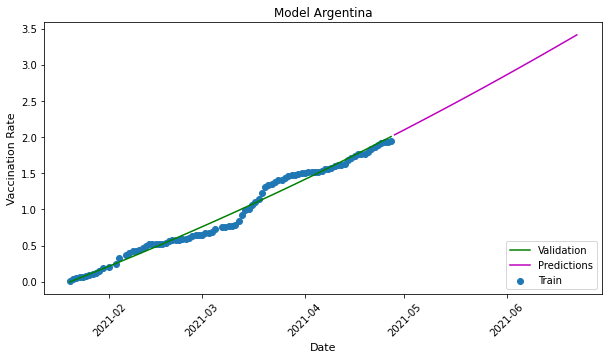

Observations in Actual Data = 94.000000, Predicted Observations=56.000000
737908 2.0302962251007557
737909 2.0538927502930164
737910 2.077546624466777
737911 2.1012578513473272
737912 2.1250264272093773
737913 2.148852350190282
737914 2.1727356277406216
737915 2.196676256135106
737916 2.2206742353737354
737917 2.2447295654565096
737918 2.2688422463834286
737919 2.293012274429202
737920 2.3172396551817656
737921 2.341524388641119
737922 2.365866471081972
737923 2.390265906229615
737924 2.4147226866334677
737925 2.4392368216067553
737926 2.4638083074241877
737927 2.48843714594841
737928 2.513123333454132
737929 2.5378668662160635
737930 2.562667755410075
737931 2.5875259954482317
737932 2.612441586330533
737933 2.637414526194334
737934 2.662444818764925
737935 2.6875324565917253
737936 2.712677448987961
737937 2.7378797940909863
737938 2.7631394881755114
737939 2.7884565331041813
737940 2.8138309251517057
737941 2.8392626717686653
737942 2.8647517692297697
737943 2.8902982156723738
73794

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

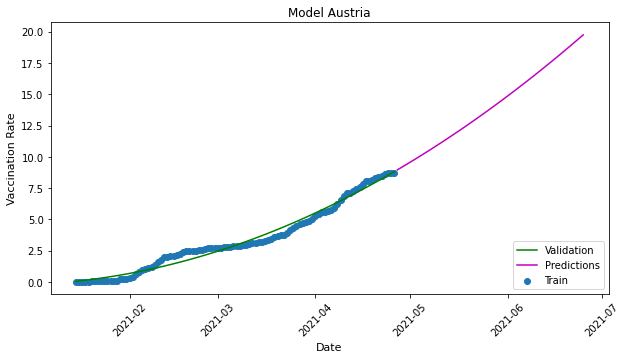

Observations in Actual Data = 102.000000, Predicted Observations=60.000000
737907 8.959898829460144
737908 9.108389139175415
737909 9.258067548274994
737910 9.40893405675888
737911 9.56098860502243
737912 9.714231312274933
737913 9.868662118911743
737914 10.024280965328217
737915 10.181087851524353
737916 10.339082896709442
737917 10.498266100883484
737918 10.658637344837189
737919 10.820196688175201
737920 10.982944130897522
737921 11.146879732608795
737922 11.312003374099731
737923 11.478315114974976
737924 11.645814895629883
737925 11.814502835273743
737926 11.98437875509262
737927 12.155442893505096
737928 12.327695071697235
737929 12.501135408878326
737930 12.67576378583908
737931 12.851580321788788
737932 13.028584897518158
737933 13.20677763223648
737934 13.386158406734467
737935 13.56672728061676
737936 13.748484253883362
737937 13.931429207324982
737938 14.115562379360199
737939 14.300883650779724
737940 14.487393021583557
737941 14.675090432167053
737942 14.863976001739502
73

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

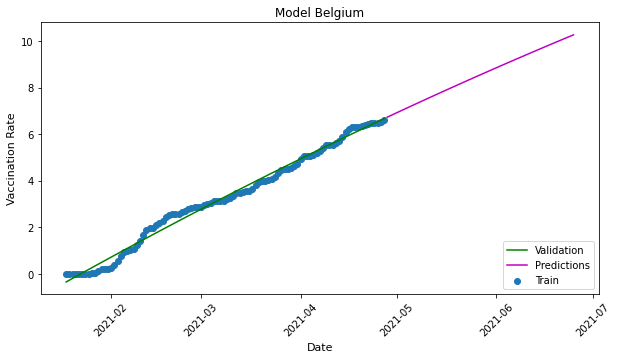

Observations in Actual Data = 100.000000, Predicted Observations=59.000000
737908 6.72765950858593
737909 6.792155936360359
737910 6.856528423726559
737911 6.920776963233948
737912 6.984901547431946
737913 7.048902206122875
737914 7.112778916954994
737915 7.176531679928303
737916 7.240160509943962
737917 7.30366538465023
737918 7.3670463263988495
737919 7.430303297936916
737920 7.493436351418495
737921 7.556445457041264
737922 7.619330622255802
737923 7.68209183961153
737924 7.744729109108448
737925 7.8072424456477165
737926 7.869631826877594
737927 7.931897260248661
737928 7.994038760662079
737929 8.056056313216686
737930 8.117949932813644
737931 8.179719597101212
737932 8.241365320980549
737933 8.302887104451656
737934 8.364284947514534
737935 8.42555882781744
737936 8.486708775162697
737937 8.547734782099724
737938 8.608636848628521
737939 8.669414967298508
737940 8.730069145560265
737941 8.790599375963211
737942 8.851005665957928
737943 8.911288000643253
737944 8.97144640237093
737

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)


('BGR', 'Europe', 'Bulgaria')
rmse:  0.05409907847394132
r2:  0.9936242032928283
('BGR', 'Europe', 'Bulgaria')
rmse:  0.05409907847394132
r2:  0.9936242032928283
('BGR', 'Europe', 'Bulgaria')
rmse:  0.05409907847394132
r2:  0.9936242032928283
('BGR', 'Europe', 'Bulgaria')
rmse:  0.05409907847394132
r2:  0.9936242032928283


<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

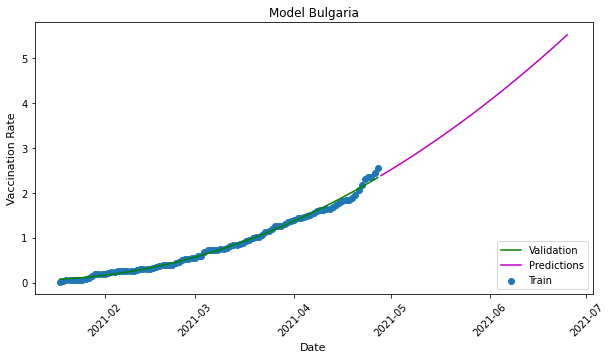

Observations in Actual Data = 100.000000, Predicted Observations=59.000000
737908 2.3818254321813583
737909 2.4246805906295776
737910 2.4679281562566757
737911 2.5115681886672974
737912 2.555600643157959
737913 2.600025489926338
737914 2.6448427885770798
737915 2.6900525093078613
737916 2.7356546372175217
737917 2.7816492319107056
737918 2.8280362337827682
737919 2.8748156428337097
737920 2.9219875037670135
737921 2.9695518016815186
737922 3.017508491873741
737923 3.065857633948326
737924 3.1145992130041122
737925 3.1637331694364548
737926 3.213259592652321
737927 3.263178452849388
737928 3.313489705324173
737929 3.36419340968132
737930 3.4152895361185074
737931 3.4667780697345734
737932 3.5186590552330017
737933 3.57093246281147
737934 3.623598277568817
737935 3.6766565442085266
737936 3.730107232928276
737937 3.7839503288269043
737938 3.838185876607895
737939 3.8928138464689255
737940 3.947834223508835
737941 4.003247052431107
737942 4.059052303433418
737943 4.11524997651577
737944 4

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

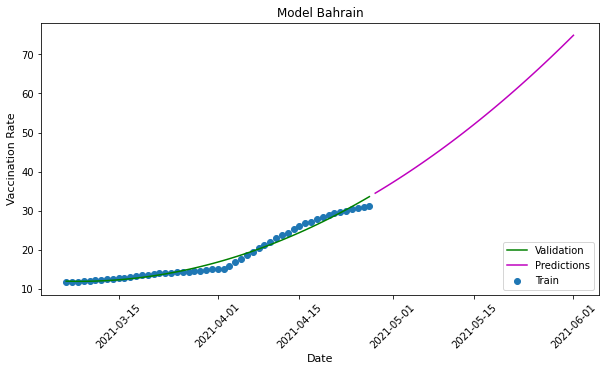

Observations in Actual Data = 53.000000, Predicted Observations=35.000000
737908 34.50260353088379
737909 35.40016460418701
737910 36.31526184082031
737911 37.24789905548096
737912 38.198073387145996
737913 39.16578960418701
737914 40.151041984558105
737915 41.15383338928223
737916 42.17416286468506
737917 43.21203327178955
737918 44.26744079589844
737919 45.340386390686035
737920 46.43087100982666
737921 47.538896560668945
737922 48.664459228515625
737923 49.807559967041016
737924 50.96819877624512
737925 52.146379470825195
737926 53.34209632873535
737927 54.555352210998535
737928 55.78614616394043
737929 57.034481048583984
737930 58.300353050231934
737931 59.583763122558594
737932 60.88471221923828
737933 62.20320224761963
737934 63.539228439331055
737935 64.89279365539551
737936 66.26389789581299
737937 67.65254211425781
737938 69.05872344970703
737939 70.48244380950928
737940 71.92370414733887
737941 73.38250160217285
737942 74.85883808135986
('BOL', 'South America', 'Bolivia')
rms

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

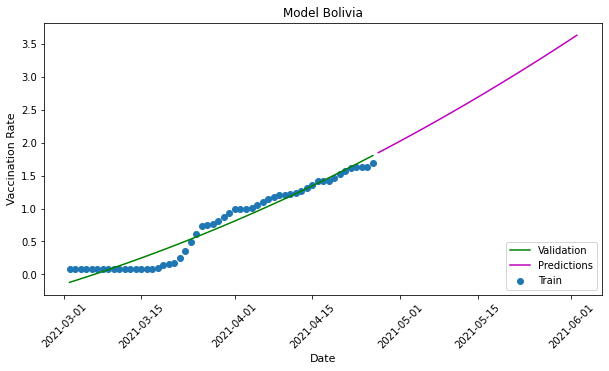

Observations in Actual Data = 56.000000, Predicted Observations=37.000000
737907 1.8473235666751862
737908 1.8913575559854507
737909 1.9357034116983414
737910 1.980361133813858
737911 2.0253307223320007
737912 2.070612132549286
737913 2.1162054389715195
737914 2.162110611796379
737915 2.2083276510238647
737916 2.2548565417528152
737917 2.301697298884392
737918 2.3488499224185944
737919 2.396314397454262
737920 2.4440907388925552
737921 2.4921789467334747
737922 2.5405790209770203
737923 2.5892909169197083
737924 2.6383147090673447
737925 2.687650367617607
737926 2.7372978776693344
737927 2.7872572541236877
737928 2.837528496980667
737929 2.8881116062402725
737930 2.9390065670013428
737931 2.990213394165039
737932 3.0417320877313614
737933 3.0935626327991486
737934 3.1457050144672394
737935 3.1981592923402786
737936 3.250925436615944
737937 3.304003432393074
737938 3.35739329457283
737939 3.4110950231552124
737940 3.4651086181402206
737941 3.5194340646266937
737942 3.574071377515793
737

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

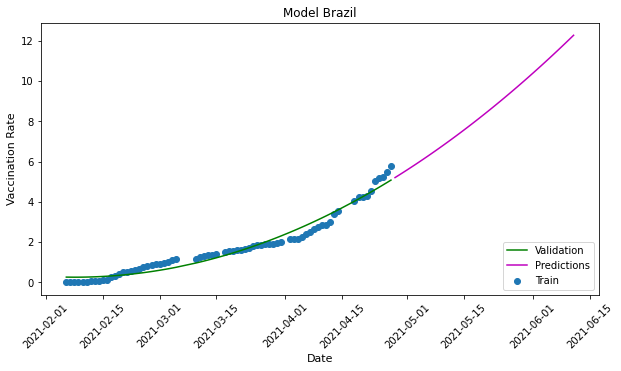

Observations in Actual Data = 72.000000, Predicted Observations=45.000000
737908 5.205284655094147
737909 5.331675350666046
737910 5.459660112857819
737911 5.589239120483398
737912 5.7204121351242065
737913 5.853179395198822
737914 5.9875407218933105
737915 6.1234962940216064
737916 6.261045873165131
737917 6.400189697742462
737918 6.540927529335022
737919 6.683259665966034
737920 6.827185809612274
737921 6.972706198692322
737922 7.119820594787598
737923 7.268529236316681
737924 7.418831944465637
737925 7.570728898048401
737926 7.724219858646393
737927 7.879305064678192
737928 8.03598427772522
737929 8.1942577958107
737930 8.354125320911407
737931 8.515587091445923
737932 8.678642868995667
737933 8.843292951583862
737934 9.009537041187286
737935 9.177375316619873
737936 9.346807718276978
737937 9.517834305763245
737938 9.69045490026474
737939 9.864669799804688
737940 10.040478706359863
737941 10.217881858348846
737942 10.396879076957703
737943 10.577470481395721
737944 10.7596559524536

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

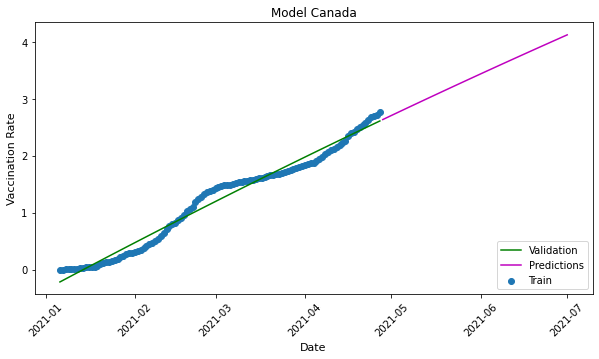

Observations in Actual Data = 112.000000, Predicted Observations=65.000000
737908 2.635306755080819
737909 2.6593363285064697
737910 2.683340847492218
737911 2.7073203157633543
737912 2.7312747333198786
737913 2.7552040992304683
737914 2.779108414426446
737915 2.802987676113844
737916 2.826841888949275
737917 2.8506710482761264
737918 2.874475155957043
737919 2.898254214785993
737920 2.9220082201063633
737921 2.945737175643444
737922 2.969441077671945
737923 2.9931199280545115
737924 3.016773729585111
737925 3.0404024766758084
737926 3.064006174914539
737927 3.087584820576012
737928 3.1111384136602283
737929 3.1346669578924775
737930 3.158170448616147
737931 3.181648889556527
737932 3.20510227791965
737933 3.228530613705516
737934 3.251933900639415
737935 3.275312134064734
737936 3.2986653177067637
737937 3.3219934487715364
737938 3.3452965281903744
737939 3.368574557825923
737940 3.391827533952892
737941 3.4150554602965713
737942 3.4382583340629935
737943 3.461436156183481
737944 3.48

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

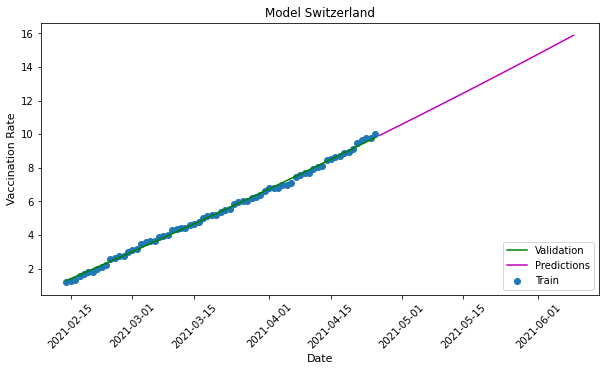

Observations in Actual Data = 71.000000, Predicted Observations=45.000000
737906 9.924375616014004
737907 10.054751195013523
737908 10.18536825478077
737909 10.316226795315742
737910 10.447326831519604
737911 10.578668355941772
737912 10.710251361131668
737913 10.842075854539871
737914 10.974141836166382
737915 11.1064493060112
737916 11.238998264074326
737917 11.371788702905178
737918 11.504820637404919
737919 11.638094052672386
737920 11.771608941257
737921 11.905365332961082
737922 12.039363212883472
737923 12.17360258102417
737924 12.308083429932594
737925 12.442805774509907
737926 12.577769599854946
737927 12.712974913418293
737928 12.848421715199947
737929 12.98411000519991
737930 13.120039775967598
737931 13.256211042404175
737932 13.392623789608479
737933 13.52927802503109
737934 13.666173748672009
737935 13.803310960531235
737936 13.940689660608768
737937 14.078309841454029
737938 14.216171517968178
737939 14.354274660348892
737940 14.492619305849075
737941 14.631205439567566


<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

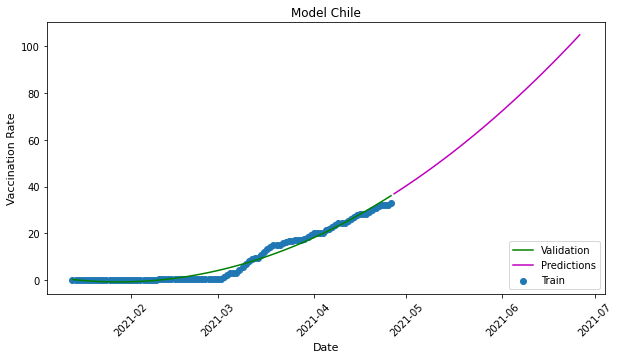

Observations in Actual Data = 104.000000, Predicted Observations=61.000000
737907 36.94778060913086
737908 37.799813747406006
737909 38.661359786987305
737910 39.532419204711914
737911 40.41299104690552
737912 41.303077697753906
737913 42.20267724990845
737914 43.1117901802063
737915 44.030415534973145
737916 44.95855522155762
737917 45.8962082862854
737918 46.84337377548218
737919 47.80005359649658
737920 48.7662467956543
737921 49.74195337295532
737922 50.72717237472534
737923 51.72190570831299
737924 52.72615194320679
737925 53.739912033081055
737926 54.763184547424316
737927 55.795971393585205
737928 56.838271141052246
737929 57.890084743499756
737930 58.95141077041626
737931 60.02225065231323
737932 61.102604389190674
737933 62.19247007369995
737934 63.291850566864014
737935 64.40074396133423
737936 65.51915121078491
737937 66.64707040786743
737938 67.78450393676758
737939 68.9314513206482
737940 70.08791160583496
737941 71.25388431549072
737942 72.42937135696411
737943 73.6143717

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

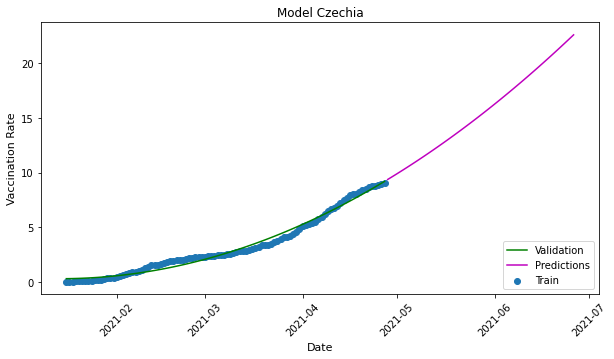

Observations in Actual Data = 102.000000, Predicted Observations=60.000000
737908 9.373535096645355
737909 9.549034535884857
737910 9.726214289665222
737911 9.905074298381805
737912 10.085614740848541
737913 10.26783537864685
737914 10.451736271381378
737915 10.637317419052124
737916 10.824579060077667
737917 11.013520777225494
737918 11.20414286851883
737919 11.396445214748383
737920 11.590427994728088
737921 11.786090910434723
737922 11.98343414068222
737923 12.182457625865936
737924 12.383161544799805
737925 12.585545659065247
737926 12.789610028266907
737927 12.99535471200943
737928 13.202779829502106
737929 13.41188508272171
737930 13.622670590877533
737931 13.835136473178864
737932 14.049282670021057
737933 14.265109121799469
737934 14.4826158285141
737935 14.701802849769592
737936 14.922670245170593
737937 15.145217835903168
737938 15.36944568157196
737939 15.595353841781616
737940 15.822942435741425
737941 16.05221116542816
737942 16.28316020965576
737943 16.515789568424225
737

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

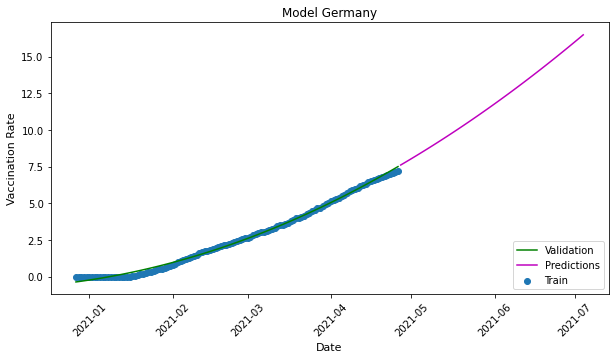

Observations in Actual Data = 121.000000, Predicted Observations=69.000000
737907 7.609523773193359
737908 7.717153072357178
737909 7.825466364622116
737910 7.934463679790497
737911 8.04414501786232
737912 8.15451031923294
737913 8.265559613704681
737914 8.377292901277542
737915 8.489710211753845
737916 8.602811485528946
737917 8.716596782207489
737918 8.831066071987152
737919 8.946219354867935
737920 9.06205666065216
737921 9.178577929735184
737922 9.29578322172165
737923 9.413672506809235
737924 9.532245814800262
737925 9.651503086090088
737926 9.771444439888
737927 9.892069727182388
737928 10.013379007577896
737929 10.135372281074524
737930 10.258049577474594
737931 10.381410866975784
737932 10.505456149578094
737933 10.630185425281525
737934 10.755598694086075
737935 10.881695985794067
737936 11.008477240800858
737937 11.13594251871109
737938 11.264091819524765
737939 11.392925083637238
737940 11.522442370653152
737941 11.652643710374832
737942 11.783528983592987
737943 11.91509824

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

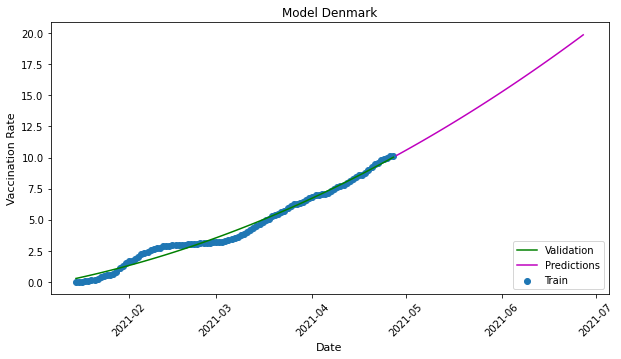

Observations in Actual Data = 103.000000, Predicted Observations=61.000000
737908 10.164470940828323
737909 10.30236566066742
737910 10.44106674194336
737911 10.580574035644531
737912 10.72088760137558
737913 10.862007468938828
737914 11.003933668136597
737915 11.146666079759598
737916 11.290204763412476
737917 11.434549748897552
737918 11.57970106601715
737919 11.725658625364304
737920 11.87242242693901
737921 12.019992530345917
737922 12.168368995189667
737923 12.317551642656326
737924 12.467540591955185
737925 12.61833581328392
737926 12.769937336444855
737927 12.922345161437988
737928 13.075559228658676
737929 13.229579597711563
737930 13.384406208992004
737931 13.54003918170929
737932 13.696478366851807
737933 13.853723853826523
737934 14.011775612831116
737935 14.17063370347023
737936 14.330298006534576
737937 14.490768611431122
737938 14.652045488357544
737939 14.814128696918488
737940 14.977018147706985
737941 15.14071387052536
737942 15.305215865373611
737943 15.47052419185638

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

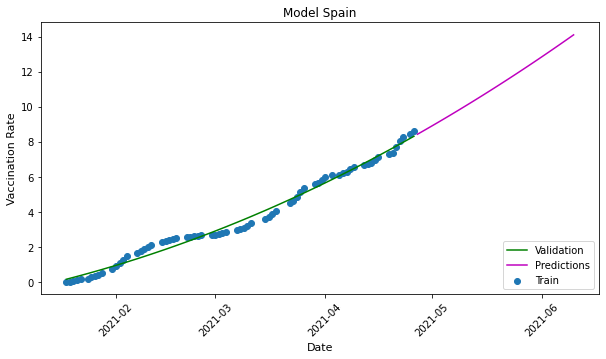

Observations in Actual Data = 71.000000, Predicted Observations=45.000000
737907 8.428547710180283
737908 8.543720334768295
737909 8.659525573253632
737910 8.775963425636292
737911 8.893033862113953
737912 9.010736972093582
737913 9.129072695970535
737914 9.248041063547134
737915 9.367641985416412
737916 9.487875580787659
737917 9.608741819858551
737918 9.730240672826767
737919 9.852372080087662
737920 9.975136190652847
737921 10.098532915115356
737922 10.22256225347519
737923 10.347224235534668
737924 10.472518771886826
737925 10.598445981740952
737926 10.725005835294724
737927 10.852198302745819
737928 10.980023324489594
737929 11.108481019735336
737930 11.237571358680725
737931 11.36729434132576
737932 11.497649848461151
737933 11.628638058900833
737934 11.760258913040161
737935 11.89251235127449
737936 12.02539837360382
737937 12.15891706943512
737938 12.293068408966064
737939 12.427852362394333
737940 12.563268929719925
737941 12.699318081140518
737942 12.83599990606308
737943 12.

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

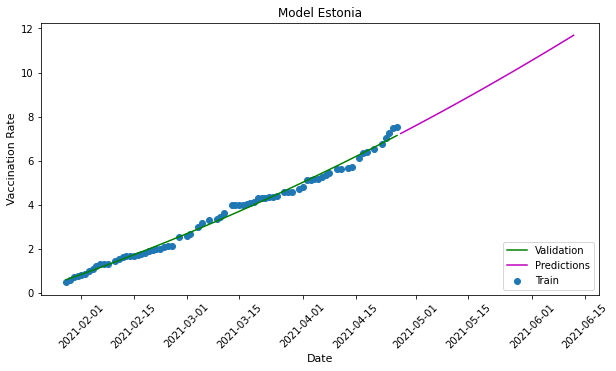

Observations in Actual Data = 75.000000, Predicted Observations=47.000000
737907 7.229662373661995
737908 7.319193959236145
737909 7.409057825803757
737910 7.499254032969475
737911 7.589782565832138
737912 7.680643364787102
737913 7.771836519241333
737914 7.863361939787865
737915 7.955219715833664
737916 8.047409802675247
737917 8.139932170510292
737918 8.232786878943443
737919 8.325973898172379
737920 8.419493198394775
737921 8.51334485411644
737922 8.607528805732727
737923 8.702045053243637
737924 8.796893626451492
737925 8.89207449555397
737926 8.987587705254555
737927 9.083433225750923
737928 9.179611027240753
737929 9.27612116932869
737930 9.37296362221241
737931 9.470138356089592
737932 9.567645445466042
737933 9.665484830737114
737934 9.76365651190281
737935 9.86216053366661
737936 9.960996821522713
737937 10.060165464878082
737938 10.159666419029236
737939 10.259499654173851
737940 10.359665244817734
737941 10.46016313135624
737942 10.560993298888206
737943 10.662155821919441
7

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

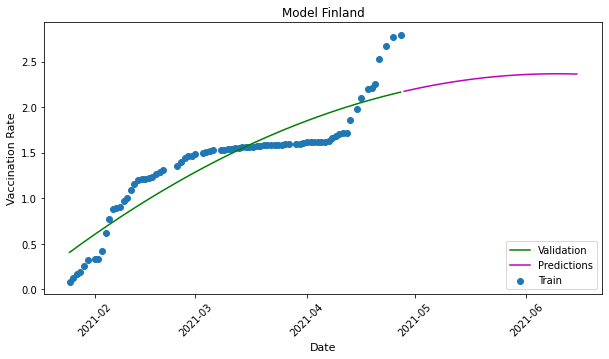

Observations in Actual Data = 81.000000, Predicted Observations=49.000000
737908 2.1738209202885628
737909 2.1827847585082054
737910 2.1915350258350372
737911 2.2000717222690582
737912 2.208394818007946
737913 2.216504357755184
737914 2.224400296807289
737915 2.2320826575160027
737916 2.2395514473319054
737917 2.246806651353836
737918 2.2538482695817947
737919 2.260676324367523
737920 2.2672907784581184
737921 2.2736916542053223
737922 2.279878966510296
737923 2.285852685570717
737924 2.2916128411889076
737925 2.297159396111965
737926 2.3024923726916313
737927 2.3076117783784866
737928 2.3125175908207893
737929 2.317209832370281
737930 2.3216884955763817
737931 2.32595357298851
737932 2.3300050795078278
737933 2.3338429927825928
737934 2.3374673277139664
737935 2.340878091752529
737936 2.3440752625465393
737937 2.347058854997158
737938 2.3498288840055466
737939 2.352385312318802
737940 2.354728177189827
737941 2.3568574488162994
737942 2.3587731346488
737943 2.36047525703907
737944 2.3

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand


rmse:  0.3253430492385625
r2:  0.9806677369155153
('FRA', 'Europe', 'France')
rmse:  0.3253430492385625
r2:  0.9806677369155153
('FRA', 'Europe', 'France')
rmse:  0.3253430492385625
r2:  0.9806677369155153


<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

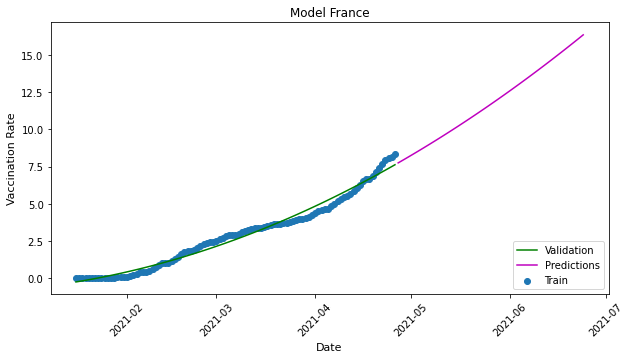

Observations in Actual Data = 101.000000, Predicted Observations=59.000000
737907 7.754536718130112
737908 7.877945393323898
737909 8.002222746610641
737910 8.127368867397308
737911 8.253383725881577
737912 8.380267411470413
737913 8.508019804954529
737914 8.636640936136246
737915 8.766130834817886
737916 8.896489530801773
737917 9.027716934680939
737918 9.159813106060028
737919 9.292778015136719
737920 9.42661166191101
737921 9.561314165592194
737922 9.69688531756401
737923 9.833325266838074
737924 9.970633953809738
737925 10.108811438083649
737926 10.247857630252838
737927 10.387772589921951
737928 10.528556287288666
737929 10.670208752155304
737930 10.81273004412651
737931 10.956120014190674
737932 11.100378721952438
737933 11.245506197214127
737934 11.391502499580383
737935 11.538367480039597
737936 11.686101227998734
737937 11.834703743457794
737938 11.984174996614456
737939 12.134515076875687
737940 12.285723835229874
737941 12.437801361083984
737942 12.590747624635696
737943 12.

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

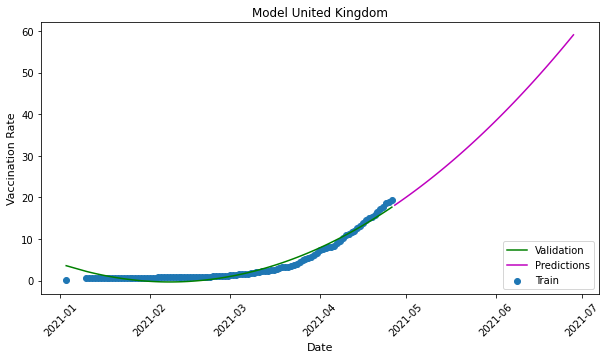

Observations in Actual Data = 108.000000, Predicted Observations=63.000000
737907 18.134029626846313
737908 18.609970569610596
737909 19.091968297958374
737910 19.58002281188965
737911 20.074134826660156
737912 20.57430362701416
737913 21.08052968978882
737914 21.592812299728394
737915 22.111152172088623
737916 22.635549306869507
737917 23.166002988815308
737918 23.702514171600342
737919 24.245082139968872
737920 24.793707370758057
737921 25.348389148712158
737922 25.909128427505493
737923 26.475924491882324
737924 27.04877734184265
737925 27.627687692642212
737926 28.212655067443848
737927 28.80367946624756
737928 29.400760412216187
737929 30.00389862060547
737930 30.613094091415405
737931 31.228346586227417
737932 31.849655628204346
737933 32.47702217102051
737934 33.110445737838745
737935 33.7499258518219
737936 34.39546346664429
737937 35.04705810546875
737938 35.70470976829529
737939 36.36841797828674
737940 37.03818368911743
737941 37.714006423950195
737942 38.395885705947876
737

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

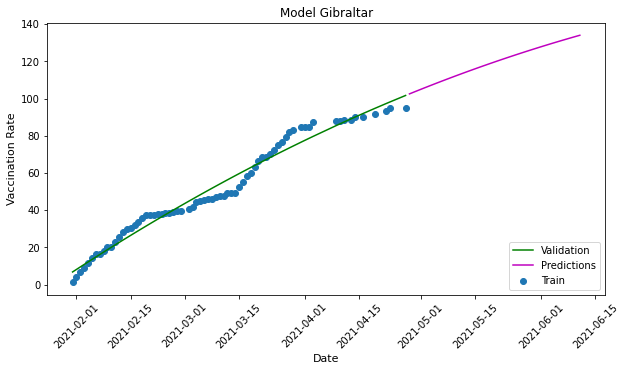

Observations in Actual Data = 71.000000, Predicted Observations=45.000000
737908 102.48953032493591
737909 103.33170628547668
737910 104.16801810264587
737911 104.9984667301178
737912 105.82305097579956
737913 106.64177227020264
737914 107.45462965965271
737915 108.26162362098694
737916 109.06275343894958
737917 109.85802030563354
737918 110.64742279052734
737919 111.43096232414246
737920 112.20863747596741
737921 112.98044967651367
737922 113.74639773368835
737923 114.50648260116577
737924 115.2607033252716
737925 116.00906085968018
737926 116.75155425071716
737927 117.48818469047546
737928 118.2189507484436
737929 118.94385385513306
737930 119.66289258003235
737931 120.37606835365295
737932 121.08338046073914
737933 121.78482842445374
737934 122.48041319847107
737935 123.17013382911682
737936 123.85399127006531
737937 124.53198456764221
737938 125.20411491394043
737939 125.87038087844849
737940 126.53078389167786
737941 127.18532276153564
737942 127.83399820327759
737943 128.47680974

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

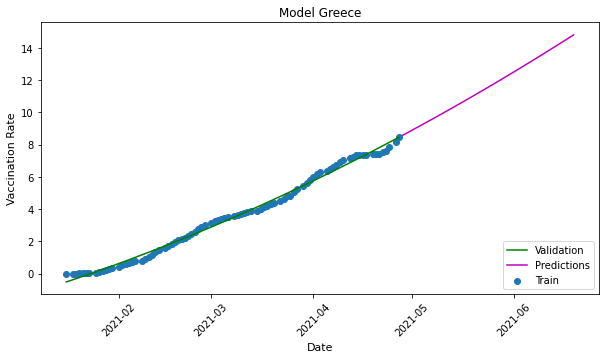

Observations in Actual Data = 88.000000, Predicted Observations=53.000000
737908 8.570941492915154
737909 8.680600240826607
737910 8.790660083293915
737911 8.901120975613594
737912 9.011982932686806
737913 9.12324595451355
737914 9.234910055994987
737915 9.346975222229958
737916 9.45944145321846
737917 9.572308763861656
737918 9.685577139258385
737919 9.799246579408646
737920 9.9133170992136
737921 10.027788683772087
737922 10.142661347985268
737923 10.25793507695198
737924 10.373609870672226
737925 10.489685729146004
737926 10.606162667274475
737927 10.723040670156479
737928 10.840319752693176
737929 10.957999899983406
737930 11.076081112027168
737931 11.194563388824463
737932 11.313446745276451
737933 11.432731181383133
737934 11.552416667342186
737935 11.672503232955933
737936 11.792990878224373
737937 11.913879573345184
737938 12.03516934812069
737939 12.156860202550888
737940 12.278952106833458
737941 12.401445090770721
737942 12.524339184165001
737943 12.64763431251049
737944 12.

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

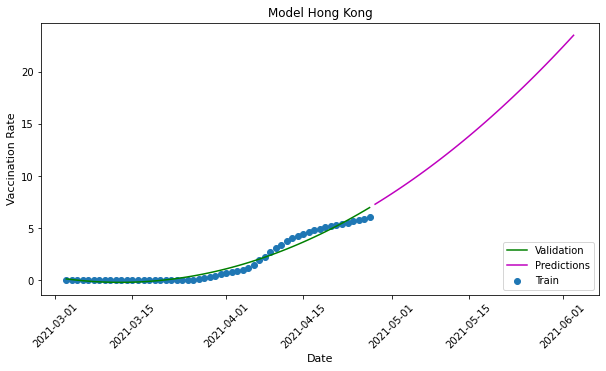

Observations in Actual Data = 56.000000, Predicted Observations=37.000000
737908 7.3099822998046875
737909 7.638023138046265
737910 7.973080158233643
737911 8.315154314041138
737912 8.664244890213013
737913 9.020352125167847
737914 9.38347578048706
737915 9.753616333007812
737916 10.130773305892944
737917 10.514946937561035
737918 10.906136989593506
737919 11.304343938827515
737920 11.709566831588745
737921 12.121806621551514
737922 12.54106330871582
737923 12.967336416244507
737924 13.400626182556152
737925 13.840932607650757
737926 14.288255453109741
737927 14.742595195770264
737928 15.203951358795166
737929 15.672323942184448
737930 16.14771294593811
737931 16.63011884689331
737932 17.11954140663147
737933 17.61598038673401
737934 18.119436264038086
737935 18.629908561706543
737936 19.14739751815796
737937 19.671902894973755
737938 20.20342493057251
737939 20.741963624954224
737940 21.28751850128174
737941 21.84009051322937
737942 22.399678945541382
737943 22.966284036636353
737944 

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

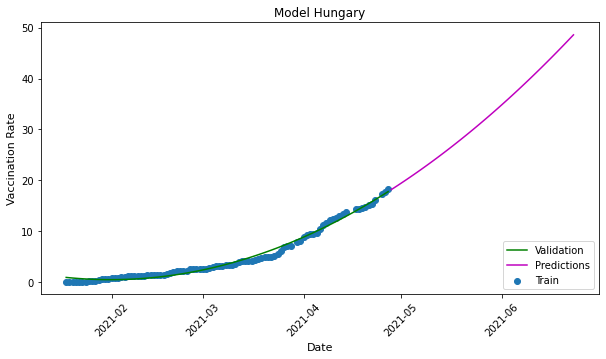

Observations in Actual Data = 96.000000, Predicted Observations=57.000000
737908 18.176567554473877
737909 18.58906126022339
737910 19.006303071975708
737911 19.428292989730835
737912 19.855031728744507
737913 20.286518812179565
737914 20.722753763198853
737915 21.163737535476685
737916 21.609469890594482
737917 22.05994987487793
737918 22.5151789188385
737919 22.97515606880188
737920 23.439881801605225
737921 23.909355401992798
737922 24.383577823638916
737923 24.862548828125
737924 25.346267461776733
737925 25.83473491668701
737926 26.327950954437256
737927 26.82591485977173
737928 27.328627586364746
737929 27.83608865737915
737930 28.348297595977783
737931 28.86525535583496
737932 29.386961460113525
737933 29.913416147232056
737934 30.444618463516235
737935 30.98056983947754
737936 31.52126955986023
737937 32.06671714782715
737938 32.61691355705261
737939 33.17185831069946
737940 33.73155093193054
737941 34.295992374420166
737942 34.865182399749756
737943 35.439120292663574
737944 3

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

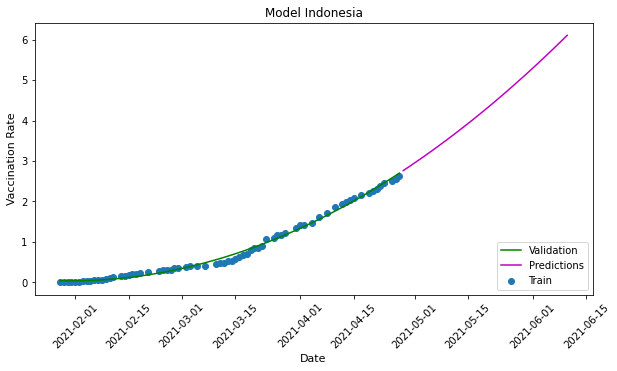

Observations in Actual Data = 70.000000, Predicted Observations=44.000000
737908 2.762386977672577
737909 2.825128585100174
737910 2.8885848224163055
737911 2.9527556598186493
737912 3.0176410377025604
737913 3.0832410156726837
737914 3.1495556235313416
737915 3.2165847718715668
737916 3.2843284904956818
737917 3.3527867794036865
737918 3.421959728002548
737919 3.491847187280655
737920 3.5624492466449738
737921 3.6337659657001495
737922 3.705797165632248
737923 3.778542995452881
737924 3.8520034551620483
737925 3.926178425550461
737926 4.0010679960250854
737927 4.0766721367836
737928 4.152990907430649
737929 4.2300242483615875
737930 4.307772129774094
737931 4.386234670877457
737932 4.465411752462387
737933 4.545303404331207
737934 4.625909626483917
737935 4.707230508327484
737936 4.789265930652618
737937 4.8720159232616425
737938 4.955480545759201
737939 5.039659708738327
737940 5.124553442001343
737941 5.210161775350571
737942 5.296484738588333
737943 5.383522242307663
737944 5.47127

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

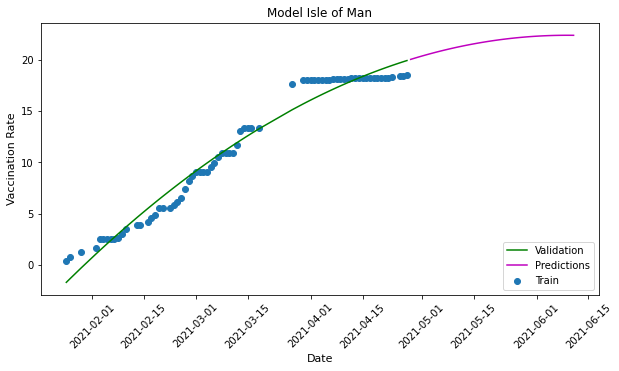

Observations in Actual Data = 72.000000, Predicted Observations=45.000000
737908 20.032771468162537
737909 20.142733097076416
737910 20.250061511993408
737911 20.354756712913513
737912 20.456818342208862
737913 20.556246638298035
737914 20.65304160118103
737915 20.74720335006714
737916 20.83873164653778
737917 20.927626490592957
737918 21.013888001441956
737919 21.097516417503357
737920 21.178511261940002
737921 21.25687277317047
737922 21.332601070404053
737923 21.405695915222168
737924 21.476157307624817
737925 21.54398536682129
737926 21.609180331230164
737927 21.671741724014282
737928 21.731669783592224
737929 21.7889643907547
737930 21.843625903129578
737931 21.89565396308899
737932 21.945048570632935
737933 21.991809964179993
737934 22.035937905311584
737935 22.077432513237
737936 22.11629366874695
737937 22.1525217294693
737938 22.186116218566895
737939 22.217077374458313
737940 22.245405197143555
737941 22.2710999250412
737942 22.294160962104797
737943 22.31458878517151
737944 

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

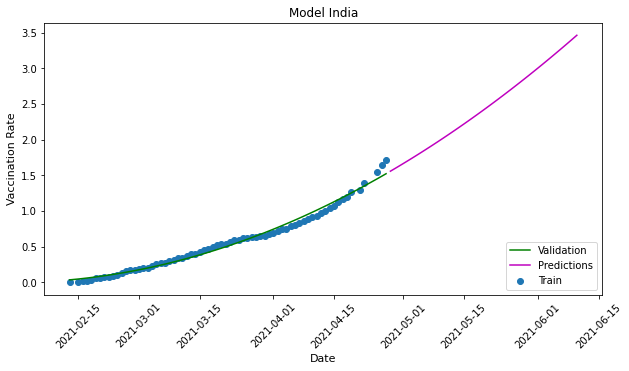

Observations in Actual Data = 70.000000, Predicted Observations=44.000000
737908 1.558989480137825
737909 1.594788745045662
737910 1.630993664264679
737911 1.667604222893715
737912 1.7046203911304474
737913 1.7420422434806824
737914 1.7798697352409363
737915 1.8181028813123703
737916 1.8567416220903397
737917 1.8957860618829727
737918 1.9352361410856247
737919 1.9750918596982956
737920 2.0153532177209854
737921 2.056020200252533
737922 2.097092851996422
737923 2.138571158051491
737924 2.1804551035165787
737925 2.2227447032928467
737926 2.265439912676811
737927 2.308540791273117
737928 2.352047324180603
737929 2.395959496498108
737930 2.4402772933244705
737931 2.4850007593631744
737932 2.5301298648118973
737933 2.5756646245718002
737934 2.621605023741722
737935 2.6679510474205017
737936 2.7147027403116226
737937 2.7618600726127625
737938 2.8094230592250824
737939 2.8573916852474213
737940 2.905765935778618
737941 2.9545458555221558
737942 3.0037314146757126
737943 3.0533226281404495
737

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

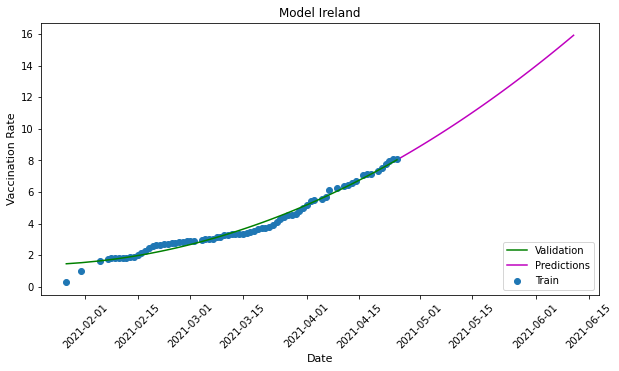

Observations in Actual Data = 75.000000, Predicted Observations=47.000000
737906 8.172013342380524
737907 8.309435069561005
737908 8.448233902454376
737909 8.588409900665283
737910 8.729962944984436
737911 8.87289309501648
737912 9.017200410366058
737913 9.162884831428528
737914 9.309946298599243
737915 9.458384931087494
737916 9.608200669288635
737917 9.759393513202667
737918 9.91196346282959
737919 10.065910518169403
737920 10.221234679222107
737921 10.377935945987701
737922 10.536014318466187
737923 10.695469796657562
737924 10.856302440166473
737925 11.01851212978363
737926 11.182098925113678
737927 11.347062885761261
737928 11.51340389251709
737929 11.681122064590454
737930 11.850217342376709
737931 12.02068966627121
737932 12.192539155483246
737933 12.365765631198883
737934 12.5403693318367
737935 12.716350138187408
737936 12.893708050251007
737937 13.072443068027496
737938 13.252555191516876
737939 13.434044480323792
737940 13.616910815238953
737941 13.801154255867004
737942 13.

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

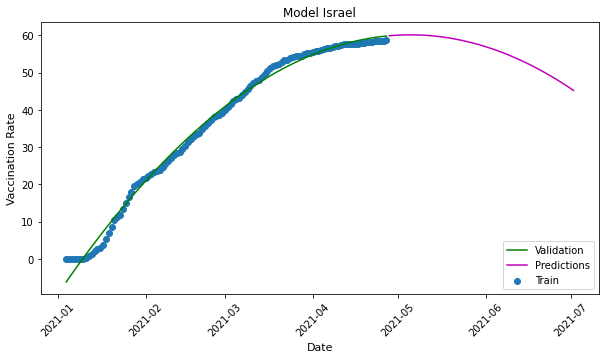

Observations in Actual Data = 114.000000, Predicted Observations=66.000000
737908 59.896151542663574
737909 59.95850419998169
737910 60.01185750961304
737911 60.05621099472046
737912 60.09156513214111
737913 60.11791944503784
737914 60.135273456573486
737915 60.14362907409668
737916 60.14298486709595
737917 60.13334131240845
737918 60.11469793319702
737919 60.08705520629883
737920 60.05041265487671
737921 60.00477075576782
737922 59.95012855529785
737923 59.88648748397827
737924 59.813847064971924
737925 59.73220682144165
737926 59.64156723022461
737927 59.54192781448364
737928 59.43328905105591
737929 59.315650939941406
737930 59.18901205062866
737931 59.05337476730347
737932 58.908737659454346
737933 58.75510120391846
737934 58.59246492385864
737935 58.42082929611206
737936 58.24019384384155
737937 58.05055856704712
737938 57.85192394256592
737939 57.64428997039795
737940 57.42765665054321
737941 57.20202398300171
737942 56.96739101409912
737943 56.723759174346924
737944 56.471127510

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

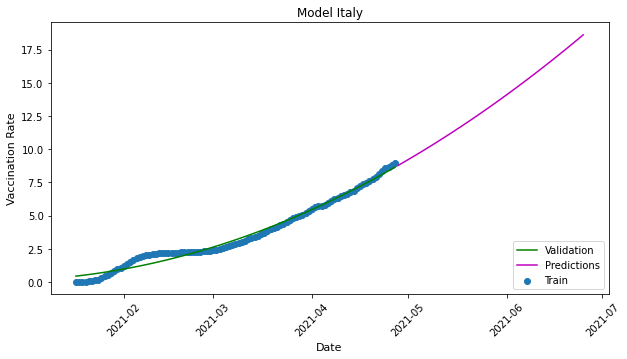

Observations in Actual Data = 101.000000, Predicted Observations=59.000000
737908 8.785637199878693
737909 8.92406165599823
737910 9.063580811023712
737911 9.204194903373718
737912 9.345903813838959
737913 9.488707482814789
737914 9.632605850696564
737915 9.777599155902863
737916 9.923687279224396
737917 10.070870220661163
737918 10.219147801399231
737919 10.368520319461823
737920 10.518987655639648
737921 10.670549809932709
737922 10.823206603527069
737923 10.976958334445953
737924 11.131804943084717
737925 11.287746131420135
737926 11.444782316684723
737927 11.6029132604599
737928 11.762139081954956
737929 11.922459542751312
737930 12.083874881267548
737931 12.246385097503662
737932 12.409990072250366
737933 12.574689745903015
737934 12.740484356880188
737935 12.907373785972595
737936 13.075358033180237
737937 13.244436919689178
737938 13.414610743522644
737939 13.585879385471344
737940 13.758242785930634
737941 13.931700944900513
737942 14.106253981590271
737943 14.281901836395264
7

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

0.40100234117031036
r2:  0.885692668539836
('KHM', 'Asia', 'Cambodia')
rmse:  0.40100234117031036
r2:  0.885692668539836


<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred


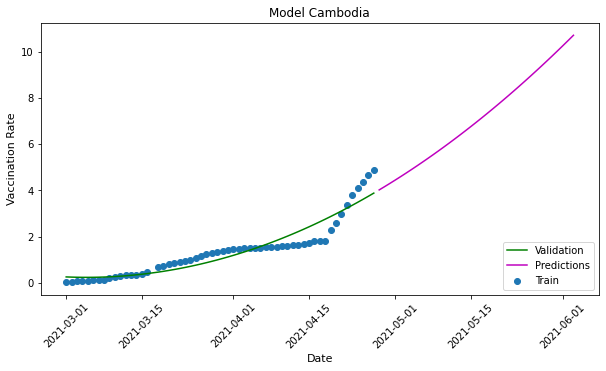

Observations in Actual Data = 57.000000, Predicted Observations=37.000000
737908 4.017442584037781
737909 4.158393144607544
737910 4.301919460296631
737911 4.4480215311050415
737912 4.596699357032776
737913 4.747952938079834
737914 4.901782274246216
737915 5.058187365531921
737916 5.217168211936951
737917 5.378724813461304
737918 5.54285728931427
737919 5.7095654010772705
737920 5.878849387168884
737921 6.050709009170532
737922 6.2251445055007935
737923 6.402155637741089
737924 6.581742644309998
737925 6.76390540599823
737926 6.948643803596497
737927 7.1359580755233765
737928 7.32584810256958
737929 7.518313884735107
737930 7.7133554220199585
737931 7.910972714424133
737932 8.111165761947632
737933 8.313934564590454
737934 8.51927924156189
737935 8.72719955444336
737936 8.937695622444153
737937 9.15076756477356
737938 9.366415143013
737939 9.584638595581055
737940 9.805437684059143
737941 10.028812646865845
737942 10.25476336479187
737943 10.48328971862793
737944 10.714391946792603
('L

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

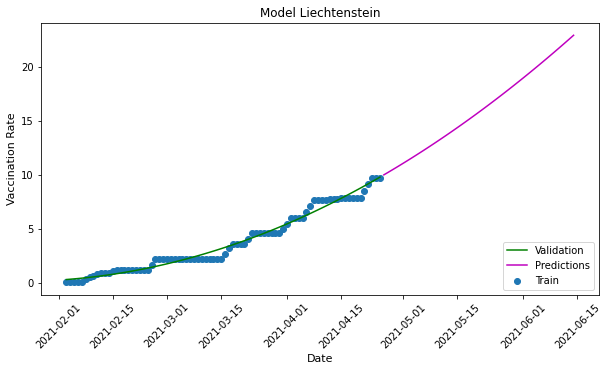

Observations in Actual Data = 82.000000, Predicted Observations=50.000000
737906 9.98072350025177
737907 10.191437363624573
737908 10.404377341270447
737909 10.619542717933655
737910 10.836934328079224
737911 11.056551337242126
737912 11.27839457988739
737913 11.502463221549988
737914 11.728757739067078
737915 11.957278370857239
737916 12.188024520874023
737917 12.42099666595459
737918 12.65619444847107
737919 12.89361822605133
737920 13.133267521858215
737921 13.375142693519592
737922 13.61924397945404
737923 13.865570783615112
737924 14.114123582839966
737925 14.364902019500732
737926 14.61790645122528
737927 14.873136520385742
737928 15.130592346191406
737929 15.390274286270142
737930 15.6521817445755
737931 15.916315197944641
737932 16.182674288749695
737933 16.45125937461853
737934 16.72207009792328
737935 16.99510657787323
737936 17.270369052886963
737937 17.54785716533661
737938 17.827571392059326
737939 18.109511137008667
737940 18.39367687702179
737941 18.680068254470825
73794

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

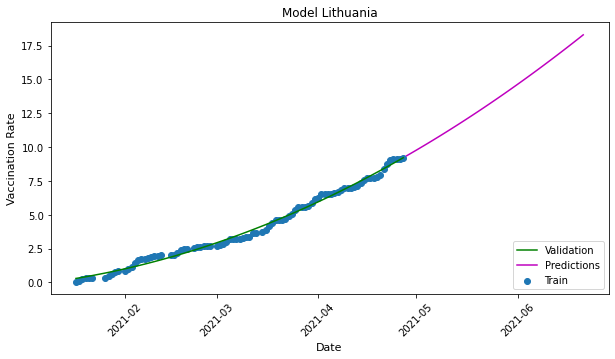

Observations in Actual Data = 92.000000, Predicted Observations=55.000000
737908 9.354030340909958
737909 9.49363774061203
737910 9.634224534034729
737911 9.775790721178055
737912 9.918336272239685
737913 10.061861246824265
737914 10.206365585327148
737915 10.35184931755066
737916 10.498312383890152
737917 10.645754873752594
737918 10.794176787137985
737919 10.943578064441681
737920 11.093958735466003
737921 11.245318800210953
737922 11.397658228874207
737923 11.55097708106041
737924 11.705275297164917
737925 11.860552906990051
737926 12.016809910535812
737927 12.1740463078022
737928 12.332262098789215
737929 12.491457253694534
737930 12.65163180232048
737931 12.812785774469376
737932 12.974919080734253
737933 13.13803181052208
737934 13.302123934030533
737935 13.46719542145729
737936 13.633246302604675
737937 13.800276577472687
737938 13.968286246061325
737939 14.137275278568268
737940 14.30724373459816
737941 14.478191554546356
737942 14.65011876821518
737943 14.82302537560463
737944

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred


('LUX', 'Europe', 'Luxembourg')
rmse:  0.33846612399161635
r2:  0.9780694291148069
('LUX', 'Europe', 'Luxembourg')
rmse:  0.33846612399161635
r2:  0.9780694291148069
('LUX', 'Europe', 'Luxembourg')
rmse:  0.33846612399161635
r2:  0.9780694291148069
('LUX', 'Europe', 'Luxembourg')
rmse:  0.33846612399161635
r2:  0.9780694291148069


<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

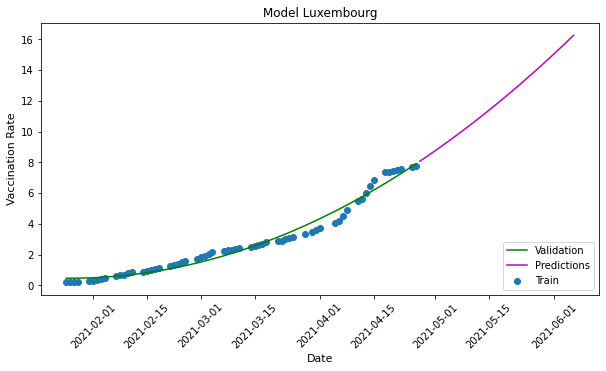

Observations in Actual Data = 64.000000, Predicted Observations=41.000000
737907 8.073984444141388
737908 8.242556631565094
737909 8.412976801395416
737910 8.585244953632355
737911 8.75936096906662
737912 8.935324847698212
737913 9.113136768341064
737914 9.292796671390533
737915 9.474304378032684
737916 9.657660067081451
737917 9.84286379814148
737918 10.02991533279419
737919 10.218814849853516
737920 10.409562408924103
737921 10.602157771587372
737922 10.796601057052612
737923 10.992892384529114
737924 11.191031575202942
737925 11.391018688678741
737926 11.592853844165802
737927 11.796536803245544
737928 12.002067744731903
737929 12.209446609020233
737930 12.418673515319824
737931 12.629748225212097
737932 12.842670917510986
737933 13.057441592216492
737934 13.274060130119324
737935 13.492526650428772
737936 13.712841153144836
737937 13.935003519058228
737938 14.15901380777359
737939 14.384872138500214
737940 14.612578272819519
737941 14.84213238954544
737942 15.073534548282623
737943

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

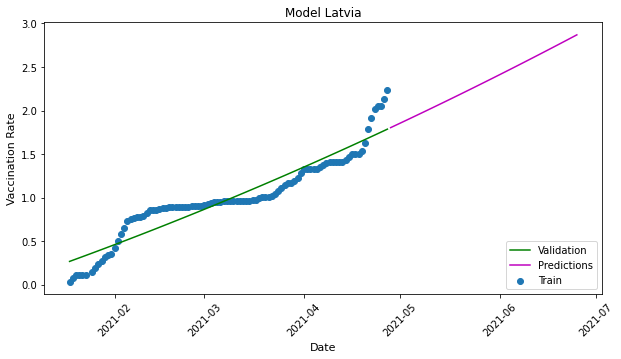

Observations in Actual Data = 99.000000, Predicted Observations=59.000000
737908 1.8029965590685606
737909 1.8202916253358126
737910 1.8376248311251402
737911 1.854996183887124
737912 1.8724056761711836
737913 1.889853311702609
737914 1.9073390867561102
737915 1.9248630069196224
737916 1.9424250684678555
737917 1.9600252732634544
737918 1.9776636194437742
737919 1.9953401051461697
737920 2.013054735958576
737921 2.0308075081557035
737922 2.048598423600197
737923 2.066427478566766
737924 2.0842946767807007
737925 2.1022000182420015
737926 2.1201435029506683
737927 2.1381251253187656
737928 2.156144892796874
737929 2.1742028035223484
737930 2.1922988556325436
737931 2.2104330491274595
737932 2.228605382144451
737933 2.246815862134099
737934 2.2650644835084677
737935 2.283351246267557
737936 2.301676146686077
737937 2.3200391940772533
737938 2.3384403847157955
737939 2.3568797167390585
737940 2.375357186421752
737941 2.3938728012144566
737942 2.4124265611171722
737943 2.4310184605419636
7

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

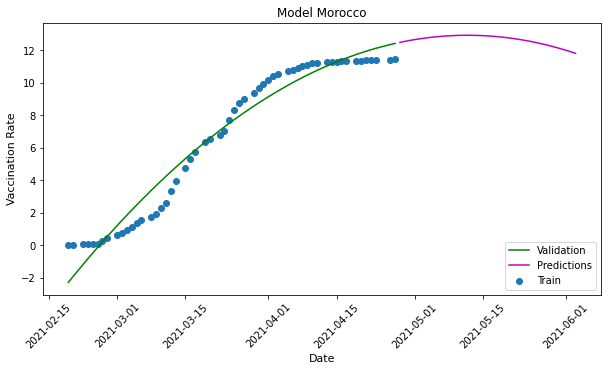

Observations in Actual Data = 56.000000, Predicted Observations=37.000000
737908 12.49222183227539
737909 12.552799940109253
737910 12.608840703964233
737911 12.660345077514648
737912 12.707313060760498
737913 12.749743938446045
737914 12.787638425827026
737915 12.820996046066284
737916 12.849817037582397
737917 12.874101161956787
737918 12.893848657608032
737919 12.909059286117554
737920 12.91973328590393
737921 12.925870656967163
737922 12.927471160888672
737923 12.924535036087036
737924 12.917062282562256
737925 12.905052661895752
737926 12.888506412506104
737927 12.867422819137573
737928 12.841803073883057
737929 12.811646461486816
737930 12.776953220367432
737931 12.737723350524902
737932 12.69395661354065
737933 12.645653247833252
737934 12.59281325340271
737935 12.535436391830444
737936 12.473522663116455
737937 12.4070725440979
737938 12.336085557937622
737939 12.26056170463562
737940 12.180501222610474
737941 12.095904111862183
737942 12.006770133972168
737943 11.9130990505218

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

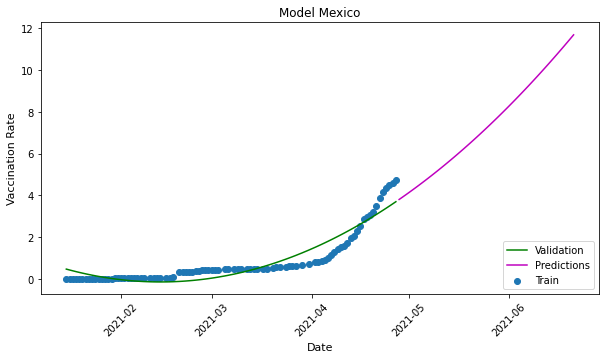

Observations in Actual Data = 91.000000, Predicted Observations=55.000000
737908 3.8080272674560547
737909 3.9155866503715515
737910 4.024592578411102
737911 4.135044813156128
737912 4.246943533420563
737913 4.360288739204407
737914 4.475080370903015
737915 4.591318488121033
737916 4.7090030908584595
737917 4.828134179115295
737918 4.948711693286896
737919 5.0707356333732605
737920 5.194206058979034
737921 5.319122910499573
737922 5.44548624753952
737923 5.573296010494232
737924 5.702552378177643
737925 5.833255052566528
737926 5.965404272079468
737927 6.098999857902527
737928 6.234041929244995
737929 6.370530486106873
737930 6.508465468883514
737931 6.647847056388855
737932 6.788675010204315
737933 6.93094938993454
737934 7.074670195579529
737935 7.219837486743927
737936 7.366451263427734
737937 7.514511466026306
737938 7.664018273353577
737939 7.814971446990967
737940 7.967371046543121
737941 8.12121707201004
737942 8.276509582996368
737943 8.433248579502106
737944 8.591434001922607


<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

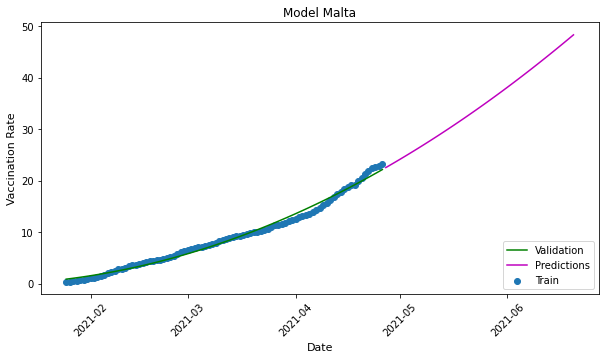

Observations in Actual Data = 92.000000, Predicted Observations=55.000000
737907 22.524004578590393
737908 22.913198351860046
737909 23.30570125579834
737910 23.701513290405273
737911 24.100634574890137
737912 24.50306463241577
737913 24.908803939819336
737914 25.31785225868225
737915 25.730209827423096
737916 26.145876288414
737917 26.564851880073547
737918 26.987136840820312
737919 27.41273057460785
737920 27.841633439064026
737921 28.273845314979553
737922 28.7093665599823
737923 29.148196697235107
737924 29.590335965156555
737925 30.035784244537354
737926 30.48454177379608
737927 30.93660831451416
737928 31.3919837474823
737929 31.85066843032837
737930 32.31266236305237
737931 32.77796518802643
737932 33.24657714366913
737933 33.71849834918976
737934 34.19372844696045
737935 34.67226755619049
737936 35.15411579608917
737937 35.63927340507507
737938 36.127739787101746
737939 36.61951529979706
737940 37.11459994316101
737941 37.61299383640289
737942 38.114696621894836
737943 38.61970

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

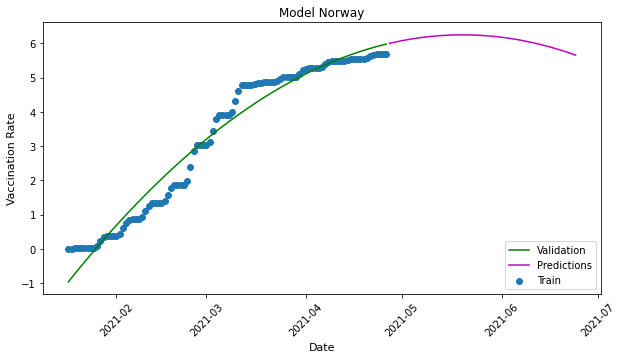

Observations in Actual Data = 100.000000, Predicted Observations=59.000000
737907 6.002666741609573
737908 6.024017691612244
737909 6.0444115698337555
737910 6.063848197460175
737911 6.08232769370079
737912 6.099850028753281
737913 6.116415202617645
737914 6.132023245096207
737915 6.1466741263866425
737916 6.16036781668663
737917 6.173104405403137
737918 6.184883803129196
737919 6.1957060396671295
737920 6.20557114481926
737921 6.214479088783264
737922 6.222429871559143
737923 6.229423522949219
737924 6.235459983348846
737925 6.240539312362671
737926 6.24466148018837
737927 6.247826486825943
737928 6.250034362077713
737929 6.251285076141357
737930 6.251578599214554
737931 6.250914990901947
737932 6.249294251203537
737933 6.246716320514679
737934 6.243181258440018
737935 6.238689035177231
737936 6.233239650726318
737937 6.22683310508728
737938 6.219469428062439
737939 6.211148589849472
737940 6.2018705904483795
737941 6.191635429859161
737942 6.180443108081818
737943 6.168293654918671
7

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

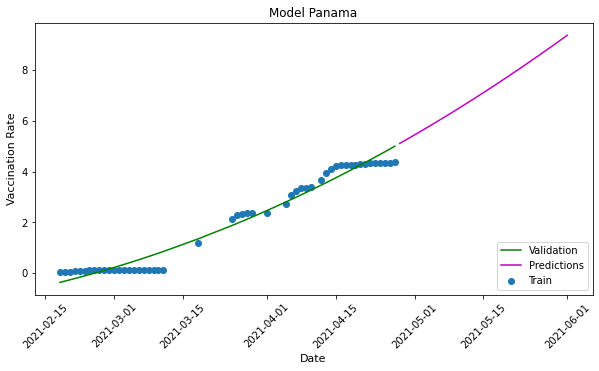

Observations in Actual Data = 51.000000, Predicted Observations=35.000000
737908 5.111546963453293
737909 5.222174346446991
737910 5.3336948454380035
737911 5.446108371019363
737912 5.559415012598038
737913 5.673614680767059
737914 5.788707375526428
737915 5.904693245887756
737916 6.021572113037109
737917 6.139344036579132
737918 6.258009076118469
737919 6.377567142248154
737920 6.49801829457283
737921 6.619362533092499
737922 6.741599828004837
737923 6.864730209112167
737924 6.988753616809845
737925 7.113670110702515
737926 7.239479720592499
737927 7.366182327270508
737928 7.493778020143509
737929 7.6222668290138245
737930 7.751648634672165
737931 7.881923586130142
737932 8.013091564178467
737933 8.145152568817139
737934 8.278106719255447
737935 8.411953896284103
737936 8.546694129705429
737937 8.68232747912407
737938 8.818853855133057
737939 8.956273287534714
737940 9.094585865736008
737941 9.233791440725327
737942 9.373890161514282
('PER', 'South America', 'Peru')
rmse:  0.054436775

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

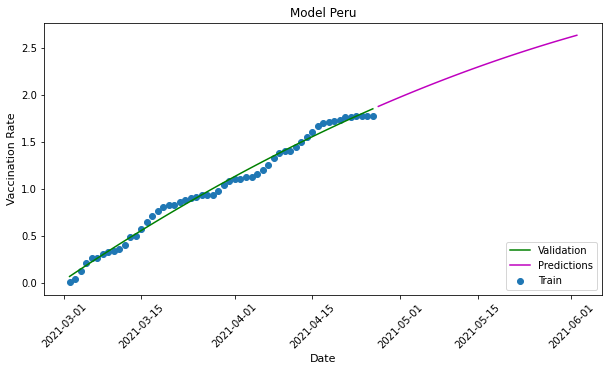

Observations in Actual Data = 56.000000, Predicted Observations=37.000000
737907 1.877199649810791
737908 1.9025159403681755
737909 1.9275868982076645
737910 1.9524125307798386
737911 1.9769928380846977
737912 2.0013278126716614
737913 2.0254174694418907
737914 2.0492617934942245
737915 2.0728607922792435
737916 2.096214458346367
737917 2.1193227991461754
737918 2.142185814678669
737919 2.1648035049438477
737920 2.1871758699417114
737921 2.2093029022216797
737922 2.231184609234333
737923 2.2528209909796715
737924 2.2742120400071144
737925 2.2953577637672424
737926 2.3162581622600555
737927 2.3369132354855537
737928 2.357322983443737
737929 2.377487398684025
737930 2.3974064886569977
737931 2.417080245912075
737932 2.436508685350418
737933 2.4556917920708656
737934 2.4746295735239983
737935 2.493322029709816
737936 2.511769153177738
737937 2.5299709513783455
737938 2.547927424311638
737939 2.5656385719776154
737940 2.5831043869256973
737941 2.600324884057045
737942 2.617300048470497
737

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

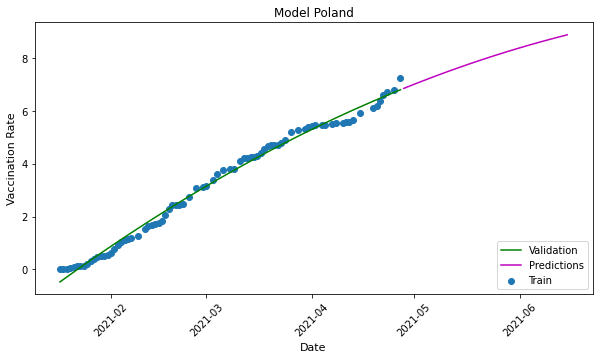

Observations in Actual Data = 80.000000, Predicted Observations=49.000000
737908 6.854882672429085
737909 6.906699404120445
737910 6.958109140396118
737911 7.0091118812561035
737912 7.0597076416015625
737913 7.109896406531334
737914 7.159678176045418
737915 7.209052950143814
737916 7.258020728826523
737917 7.306581526994705
737918 7.3547353297472
737919 7.402482137084007
737920 7.449821949005127
737921 7.49675478041172
737922 7.543280601501465
737923 7.589399442076683
737924 7.635111317038536
737925 7.68041618168354
737926 7.725314036011696
737927 7.769804909825325
737928 7.813888788223267
737929 7.857565686106682
737930 7.900835573673248
737931 7.943698480725288
737932 7.986154392361641
737933 8.028203308582306
737934 8.069845229387283
737935 8.111080169677734
737936 8.151908114552498
737937 8.192329064011574
737938 8.232343018054962
737939 8.271949976682663
737940 8.311149954795837
737941 8.349942937493324
737942 8.388328924775124
737943 8.426307916641235
737944 8.46387992799282
7379

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

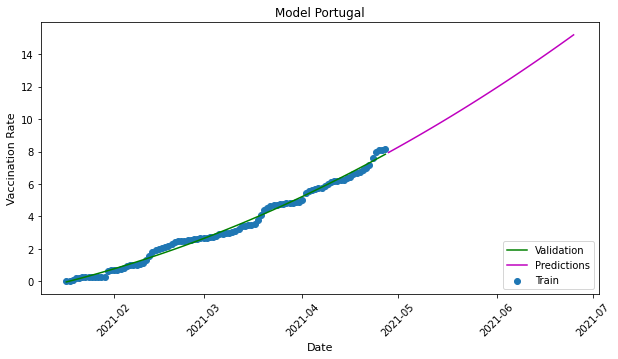

Observations in Actual Data = 101.000000, Predicted Observations=59.000000
737908 7.943936616182327
737909 8.052467614412308
737910 8.161577612161636
737911 8.271266460418701
737912 8.381534337997437
737913 8.492381125688553
737914 8.603806763887405
737915 8.715811431407928
737916 8.82839497923851
737917 8.941557496786118
737918 9.055298954248428
737919 9.169619292020798
737920 9.284518629312515
737921 9.399996846914291
737922 9.516054034233093
737923 9.632690161466599
737924 9.749905169010162
737925 9.867699176073074
737926 9.986072063446045
737927 10.105023950338364
737928 10.224554747343063
737929 10.344664424657822
737930 10.465353101491928
737931 10.586620658636093
737932 10.708467215299606
737933 10.8308926820755
737934 10.953897058963776
737935 11.077480405569077
737936 11.201642632484436
737937 11.326383829116821
737938 11.451703995466232
737939 11.57760301232338
737940 11.704081058502197
737941 11.831137955188751
737942 11.958773851394653
737943 12.086988657712936
737944 12.21

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

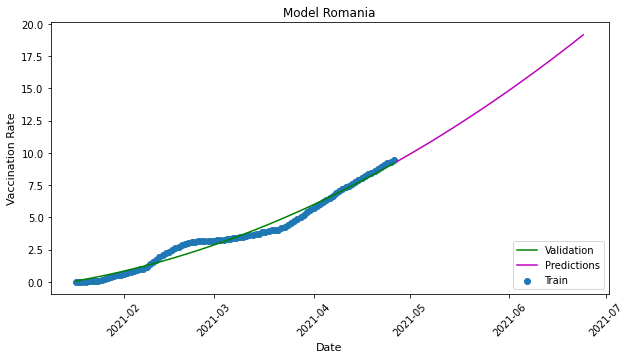

Observations in Actual Data = 100.000000, Predicted Observations=59.000000
737907 9.334898561239243
737908 9.476504862308502
737909 9.619082510471344
737910 9.762631624937057
737911 9.90715217590332
737912 10.052644044160843
737913 10.199107378721237
737914 10.346542030572891
737915 10.49494817852974
737916 10.644325733184814
737917 10.794674634933472
737918 10.945995002985
737919 11.098286747932434
737920 11.251549869775772
737921 11.40578442811966
737922 11.560990422964096
737923 11.717167735099792
737924 11.874316543340683
737925 12.032436668872833
737926 12.191528260707855
737927 12.351591289043427
737928 12.512625634670258
737929 12.67463144659996
737930 12.83760866522789
737931 13.001557230949402
737932 13.166477262973785
737933 13.332368642091751
737934 13.499231487512589
737935 13.667065739631653
737936 13.8358713388443
737937 14.005648374557495
737938 14.17639684677124
737939 14.348116666078568
737940 14.520807921886444
737941 14.69447061419487
737942 14.869104623794556
737943

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

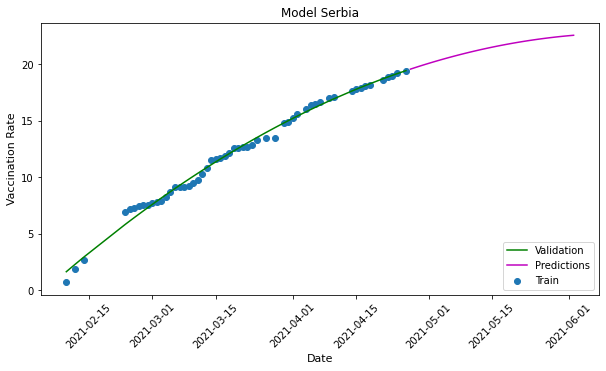

Observations in Actual Data = 55.000000, Predicted Observations=37.000000
737907 19.574540376663208
737908 19.705439567565918
737909 19.83361041545868
737910 19.95905303955078
737911 20.081767916679382
737912 20.201754212379456
737913 20.319012761116028
737914 20.433542847633362
737915 20.545344829559326
737916 20.6544189453125
737917 20.760764598846436
737918 20.864382147789
737919 20.965271711349487
737920 21.063433051109314
737921 21.15886616706848
737922 21.25157129764557
737923 21.341548204421997
737924 21.428796887397766
737925 21.513317704200745
737926 21.595110058784485
737927 21.674174547195435
737928 21.750510692596436
737929 21.824118733406067
737930 21.894998788833618
737931 21.96315050125122
737932 22.028573989868164
737933 22.091269731521606
737934 22.15123701095581
737935 22.208476066589355
737936 22.2629873752594
737937 22.314770221710205
737938 22.36382484436035
737939 22.410151720046997
737940 22.453750133514404
737941 22.49462068080902
737942 22.5327627658844
737943 

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

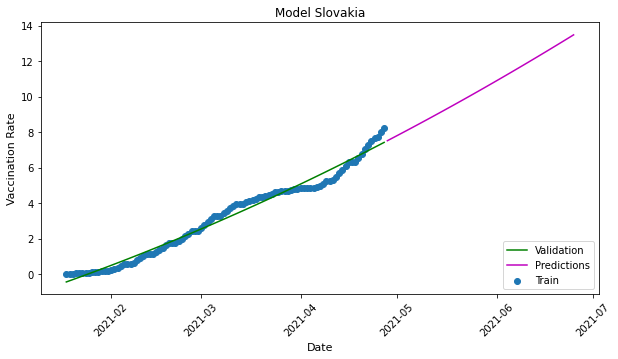

Observations in Actual Data = 100.000000, Predicted Observations=59.000000
737908 7.517061725258827
737909 7.611472859978676
737910 7.706178247928619
737911 7.801177948713303
737912 7.896471932530403
737913 7.992060214281082
737914 8.087942779064178
737915 8.184119656682014
737916 8.280590817332268
737917 8.377356320619583
737918 8.474416077136993
737919 8.571770131587982
737920 8.66941848397255
737921 8.767361119389534
737922 8.865598067641258
737923 8.9641292989254
737924 9.062954857945442
737925 9.16207468509674
737926 9.261488810181618
737927 9.361197233200073
737928 9.461199939250946
737929 9.561496943235397
737930 9.662088245153427
737931 9.762973845005035
737932 9.864153772592545
737933 9.96562796831131
737934 10.067396447062492
737935 10.169459238648415
737936 10.271816313266754
737937 10.374467685818672
737938 10.477413356304169
737939 10.580653339624405
737940 10.684187605977058
737941 10.78801615536213
737942 10.892139002680779
737943 10.996556147933006
737944 11.10126759111

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

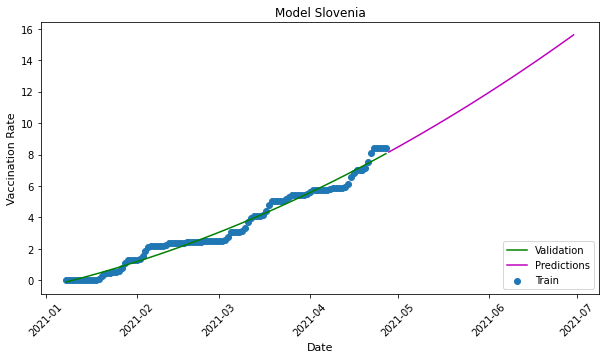

Observations in Actual Data = 110.000000, Predicted Observations=64.000000
737908 8.162527978420258
737909 8.265375673770905
737910 8.368722945451736
737911 8.472569704055786
737912 8.576915979385376
737913 8.681761741638184
737914 8.787106961011887
737915 8.892951726913452
737916 8.999295979738235
737917 9.106139749288559
737918 9.213483035564423
737919 9.32132574915886
737920 9.429668009281158
737921 9.538509786128998
737922 9.647851079702377
737923 9.757691860198975
737924 9.868032068014145
737925 9.9788718521595
737926 10.090211123228073
737927 10.202049911022186
737928 10.31438821554184
737929 10.427225947380066
737930 10.540563225746155
737931 10.654400020837784
737932 10.76873630285263
737933 10.883572101593018
737934 10.998907327651978
737935 11.114742130041122
737936 11.231076419353485
737937 11.347910225391388
737938 11.465243458747864
737939 11.583076268434525
737940 11.701408565044403
737941 11.8202403485775
737942 11.939571678638458
737943 12.059402406215668
737944 12.1797

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

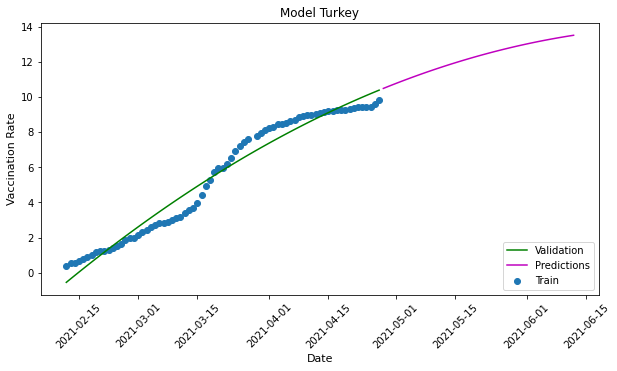

Observations in Actual Data = 74.000000, Predicted Observations=46.000000
737908 10.484281480312347
737909 10.580705165863037
737910 10.675797939300537
737911 10.769559979438782
737912 10.861990988254547
737913 10.953091144561768
737914 11.042860507965088
737915 11.131298899650574
737916 11.21840637922287
737917 11.30418312549591
737918 11.388628840446472
737919 11.471743643283844
737920 11.55352771282196
737921 11.633980810642242
737922 11.713102996349335
737923 11.790894389152527
737924 11.867354810237885
737925 11.942484378814697
737926 12.01628315448761
737927 12.088750898838043
737928 12.159887790679932
737929 12.22969388961792
737930 12.298169016838074
737931 12.365313291549683
737932 12.431126773357391
737933 12.49560922384262
737934 12.558760821819305
737935 12.62058162689209
737936 12.68107146024704
737937 12.7402303814888
737938 12.798058569431305
737939 12.85455572605133
737940 12.909721970558167
737941 12.963557541370392
737942 13.016062021255493
737943 13.06723564863205
73

<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['date_transformed'] = group['date'].map(dt.datetime.toordinal)
<ipython-input-56-b5425ebac7d1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Pred'] = y_poly_pred
<ipython-input-56-b5425ebac7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

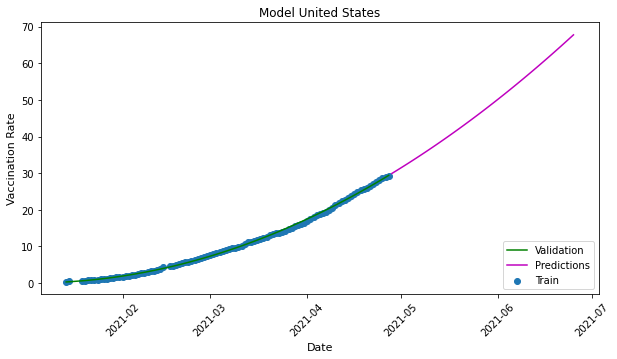

Observations in Actual Data = 100.000000, Predicted Observations=59.000000
737908 29.91369128227234
737909 30.436702013015747
737910 30.964252948760986
737911 31.4963436126709
737912 32.03297400474548
737913 32.57414436340332
737914 33.11985445022583
737915 33.67010426521301
737916 34.22489380836487
737917 34.7842230796814
737918 35.34809184074402
737919 35.91650080680847
737920 36.4894495010376
737921 37.0669379234314
737922 37.64896607398987
737923 38.23553419113159
737924 38.82664203643799
737925 39.42228960990906
737926 40.0224769115448
737927 40.627203702926636
737928 41.236470460891724
737929 41.85027718544006
737930 42.468623638153076
737931 43.09151005744934
737932 43.7189359664917
737933 44.35090184211731
737934 44.98740744590759
737935 45.62845277786255
737936 46.27403736114502
737937 46.9241623878479
737938 47.578827142715454
737939 48.23803162574768
737940 48.90177583694458
737941 49.57005977630615
737942 50.24288368225098
737943 50.920247316360474
737944 51.602150678634644

In [58]:
# Implement the model into each category of the grouped data to get country-wise predictions.
# Dictionaries to save the results of the model
dct_original = {}
dct_future = {}
# Access each country data seperately
for name, group in df_grouped:
    # Make sure to select countries without NaN values in vaccination_rates
    group1 = group[group['people_fully_vaccinated'].notna()]
    # Countries with at least 50 vaccination data points for better predictions
    if len(group1) > 50:
    # Save outputs from the function into the following variables
        predict_dates = poly(name, group1)[2]
        model = poly(name, group1)[0]
        polynomial_features = poly(name, group1)[1]
        group_export = poly(name, group1)[3]
        group_export['Location'] = name[2]
    # Future predictions for the range of dates specified in the function. Again, remember to tranform the input
        Predictions = model.predict(polynomial_features.fit_transform(np.array(predict_dates).reshape(-1,1)))

    # Putting the predictions and dates into a dataframe
        Predictions_df = pd.DataFrame({'Future_dates': list(predict_dates),'Predictions': list(Predictions)})
    # Converting the transformed dates to original date format
        Predictions_df = Predictions_df.set_index(Predictions_df['Future_dates'].map(dt.datetime.fromordinal))
    # Add country to the dataframe to identify the data
        Predictions_df['Location'] = name[2]

    # Save input data predictions and future predictions into dictionaries to access later
        dct_original[name] = group_export
        dct_future[name] = Predictions_df
    # Plot current observed, predicted and future predicted data
        plt.figure(figsize=(10,5))
        plt.xticks(rotation=45)
        plt.title('Model ' + name[2])
        plt.xlabel('Date', fontsize=11)
        plt.ylabel('Vaccination Rate', fontsize=11)
        plt.scatter(group_export.index, group_export['vaccination_rate'])
        plt.plot(group_export['Pred'], color = 'g')
        plt.plot(Predictions_df[['Predictions']], color = 'm')
        plt.legend(['Validation', 'Predictions', 'Train'], loc='lower right')
        plt.show()

    # View the Actual vs Predicted data and their data count
        print('Observations in Actual Data = %f, Predicted Observations=%f' % (len(group1), len(Predictions)))
        print( "\n".join("{} {}".format(x, y) for x, y in zip(predict_dates, Predictions)))

Model alternative
Alternatively, if we were to try and attain more generic predictions and
avoid possible overfitting, we could consider changing the degree from
2 to 1 which will make it a linear regression model.
Looking at the somewhat linear characteristic of the plot,
we can also safely say that a linear model for a trend as such,
should suffice. So let’s see if the linear model predicts any differently
for this particular country. I am just going to go ahead and replace the
polynomial model for the US. We will use the same code structure as for the
polynomial model, except this time, we will not use “polynomial_features”.


('USA', 'North America', 'United States')
rmse:  1.781584560666592
r2:  0.9573738687074483


<ipython-input-59-9341a1933442>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1['date_transformed'] = group1['date'].map(dt.datetime.toordinal) # transform date column into integer to be able to build model
<ipython-input-59-9341a1933442>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1['Pred'] = y_pred


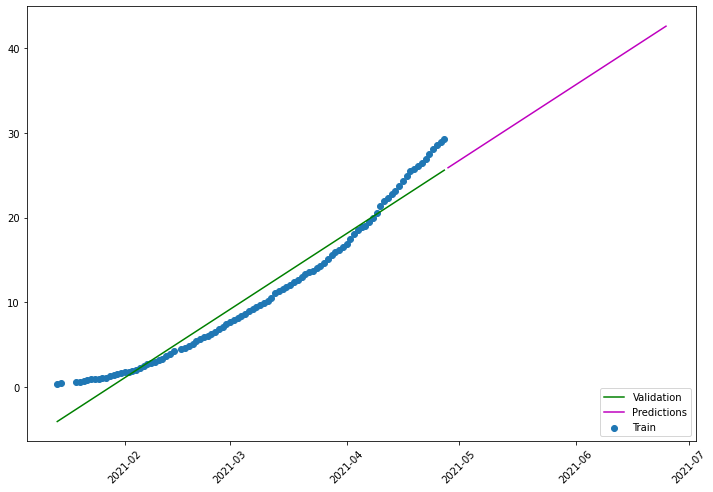

In [59]:
for name, group in df_grouped:
    if name[2] == "United States": # Only for the US
        group1 = group[group['people_fully_vaccinated'].notna()]
        group1['date_transformed'] = group1['date'].map(dt.datetime.toordinal) # transform date column into integer to be able to build model
        Range = group1['date_transformed'].max() + round(len(group1)/2) + 10
        predict_dates = list(range(group1['date_transformed'].max() + 1, Range)) # create a range of dates to make future predictions
        x = group1['date_transformed'].values[:,np.newaxis] # input data transformed
        y = group1['vaccination_rate'].values # input train data
        model = LinearRegression()
        model.fit(x, y) # Fitting linear regression
        y_pred = model.predict(x)
        group1['Pred'] = y_pred
        r2 = model.score(x,y) # alternatively, r-squared can also be measured this way
        rmse = mean_squared_error(y, y_pred, squared=False)
        group_export = group1[['date','vaccination_rate','Pred']].set_index('date')
        Predictions = model.predict(np.array(predict_dates).reshape(-1,1))
        Predictions_df = pd.DataFrame({'Future_dates': list(predict_dates),'Predictions': list(Predictions)})
        Predictions_df = Predictions_df.set_index(Predictions_df['Future_dates'].map(dt.datetime.fromordinal))
        plt.xticks(rotation=45)
        print(name)
        print('rmse: ', rmse)
        print('r2: ', r2)
        plt.scatter(group_export.index, group_export['vaccination_rate'])
        plt.plot(group_export['Pred'], color = 'g')
        plt.plot(Predictions_df[['Predictions']], color = 'm')
        plt.legend(['Validation', 'Predictions', 'Train'], loc='lower right')